In [4]:
# ---------- Lacy et al. (2004, 2007) ----------

# ----- TLDR -----

# Using the SDSS DR1 quasar catalogue, La04 define a diagnostic wedge in IRAC CCS within which AGN are expected to reside. They state that their ratio
# selection is effective in separating objects with blue spectra from those with red. Objects that are blue in both axes are likely to be stars or
# low-z galaxies that are weak in non-stellar light, whereas those that are red in both filters are likely to be AGN. Lao4's reliance on shallow IRAC
# data limits the applicability of this diagnostic to low-z candidates only, with their approach to boundary constraints introducing additional bias 
# towards towards luminous AGN.

# ----- Expanded Overview -----

# Lao4 was developed to aid in identifying/quanitfying the number of AGN missed in optical and soft X-ray surveys due to obscuration. While observations
# of heavily obscured AGN still suffer from extinction in the MIR regime, toroidal geometry dictates that emission should still be visible unless the AGN
# is 1) viewed edge on, or 2) completely enveloped in dense circumnuclear matter. Lao4/7 utilises the preliminary IRAC and MIPS catalogues from Spitzer 
# FLS data (2003), which has flux density limits of S3.6 ~ 7 uJy, S4.5 ~ 8 uJy, S5.8 ~ 60 uJy, and S8.0 ~ 50 uJy for nominal central wavelengths of 3.6, 
# 4.5, 5.8, and 8.0 um, and of S24 ~ 300 uJy for the MIPS 24 um band. They crossmatch this data with the SDSS DR1 quasar catalogue, yielding a referential
# sample of 54 quasars from which to constrain a diagnostic region in IRAC CCS.

# By gauging the S8.0 um (the longest wavelength and hence the least affected by dust obscuration) distributions of FLS sources that fall within this
# region, they establish a threshold of S8.0 > 1 mJy above which unobscured FLS AGN are expected to appear in the SDSS sample. Of the 43 that have clean
# S8.0 > 1 mJy detections in the IRAC FLS catalogue, they eject 14 for being known quasars, 2 for being known radio quasars, and 7 more for being either
# saturated stars or otherwise unreliable (this particular step was done by hand), leaving 20 bright, unobscured candidates. To confirm the nature of
# these candidates, they generate a secondary CC plot extending into the MIPS 24um band and find that their obscured candidates reside in the same
# region as that of the SDSS quasars. All 20 were further identified in the R-band images of Fadda et al. (2004; limiting R ~ 25.5), with 3 being found
# to have MIR - optical colours and morphologies consistent with normal quasars. Another was ejected for being a suspected foreground (R = 15.7). Of the
# remaining 16 candidates, 14 were found to be extended in the R band such that they were most likely completely obscured in the optical regime. The 
# other two were faint in R but pointlike in nature, and were thus likely to be only partially obscured. photometric z distributions yielded a median of
# z ~ 0.36 for obscured candidates, compared to a median of ~ 0.69 for SDSS quasars with S8.0 > 1 mJy. This may imply that obscured AGN are populous at
# lower z and luminosities. They state that MIR selection is independent of optical properties and that selection effects are unlikely to account for
# this difference. They further note that a lower median z may be consistent with the large numbers of LL, relatively low z, obscured AGN implied by an 
# imbalance in cosmic X-ray background, as well as the 'receding torus' model proposed by Lawrence (1991) wherein a higher fraction of LLAGN are 
# obscured. If unobscured, they state that their obscured candidates would be moderately luminous with B-band magnitudes of ~22, placing them on the 
# boundary between Sy1s and QSOs, while their most luminous candidate would place closer to the median SDSS sample with a B-band magnitude of ~ -23.

# ----- Expanded IRAC Discussion -----

# MIR relatively insensitive to obscuration. IRAC filters sample the hot dust signature present in 80 - 95% of luminous AGN regardless of obscuration.
# At low redshift (z < 2 - 3), contamination is predominantly due to strong PAH emission as well as extreme obscuration, the latter of which impacts 
# each channel to different degrees. AT high redshifts, contamination stems from limitatiosn in observed wavelengths. IRAC filters primarily probe the 
# rest-frame 1.6um, where obscured SF systems present red colors mimicking those of AGN. 

In [1]:
# ---------- Import Packages ----------

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib as mpl
import seaborn as sns
import os
from astropy.io import fits
from matplotlib_venn import venn3
from matplotlib.patches import PathPatch
import matplotlib.patheffects as PathEffects
import matplotlib.patches as patches
from matplotlib.lines import Line2D

In [10]:
# ---------- Read and Refine ----------

# ----- Read Data -----

cdfs = pd.read_csv(os.path.join('/', 'Users', 'jess', 'Desktop', 'data', 'raw', 'cdfs', 'cdfs_in_df.csv'))
cos = pd.read_csv(os.path.join('/', 'Users', 'jess', 'Desktop', 'data', 'raw', 'cosmos', 'cos_in_df.csv'))
uds = pd.read_csv(os.path.join('/', 'Users', 'jess', 'Desktop', 'data', 'raw', 'uds', 'uds_in_df.csv'))



# ----- Exclude sources with use == 0 and SNR < 5 -----

#cdfs = cdfs[(cdfs['use'] == 1) & (cdfs['SNR_36'] > 5) & (cdfs['SNR_45'] > 5) & (cdfs['SNR_58'] > 5) & (cdfs['SNR_80'] > 5)]
#cos = cos[(cos['use'] == 1) & (cos['SNR_36'] > 5) & (cos['SNR_45'] > 5) & (cos['SNR_58'] > 5) & (cos['SNR_80'] > 5)]
#uds = uds[(uds['use'] == 1) & (uds['SNR_36'] > 5) & (uds['SNR_45'] > 5) & (uds['SNR_58'] > 5) & (uds['SNR_80'] > 5)]



# ----- Exclude sources with -99 IRAC/MIPS flux entries -----

#cdfs = cdfs[(cdfs['f_36'] != -99) & (cdfs['f_45'] != -99) & (cdfs['f_58'] != -99) & (cdfs['f_80'] != -99)]
#cos = cos[(cos['f_36'] != -99) & (cos['f_45'] != -99) & (cos['f_58'] != -99) & (cos['f_80'] != -99)]
#uds = uds[(uds['f_36'] != -99) & (uds['f_45'] != -99) & (uds['f_58'] != -99) & (uds['f_80'] != -99)]



# ----- Exclude sources with NaN IRAC/MIPS flux/ratio/magnitude entries -----

#cos = cos.dropna(subset = ['AB_36', 'AB_45', 'AB_58', 'AB_80', '80_45', '58_36'])
#uds = uds.dropna(subset = ['AB_36', 'AB_45', 'AB_58', 'AB_80', '80_45', '58_36'])
#cdfs = cdfs.dropna(subset = ['AB_36', 'AB_45', 'AB_58', 'AB_80', '80_45', '58_36'])


In [21]:
# ---------- Masks and Parameters ----------

# ----- Redshift Masks

def redshift_mask(df, lower, upper = None):
    z = np.where(df['z_spec'] == -99, df['z_peak'], df['z_spec'])
    if upper is None:
        return lower < z
    else:
        return (lower < z) & (z < upper)

cdfs_z01, cos_z01, uds_z01 = (redshift_mask(cdfs, 0, 1), redshift_mask(cos, 0, 1), redshift_mask(uds, 0, 1))
cdfs_z12, cos_z12, uds_z12 = (redshift_mask(cdfs, 1, 2), redshift_mask(cos, 1, 2), redshift_mask(uds, 1, 2))
cdfs_z23, cos_z23, uds_z23 = (redshift_mask(cdfs, 2, 3), redshift_mask(cos, 2, 3), redshift_mask(uds, 2, 3))
cdfs_z34, cos_z34, uds_z34 = (redshift_mask(cdfs, 3, 4), redshift_mask(cos, 3, 4), redshift_mask(uds, 3, 4))
cdfs_z4, cos_z4, uds_z4 = (redshift_mask(cdfs, 4), redshift_mask(cos, 4), redshift_mask(uds, 4))

cdfs_bel_18, cos_bel_18, uds_bel_18 = redshift_mask(cdfs, 0, 1.8), redshift_mask(cos, 0, 1.8), redshift_mask(uds, 0, 1.8)
cdfs_abo_18, cos_abo_18, uds_abo_18 = redshift_mask(cdfs, 1.8), redshift_mask(cos, 1.8), redshift_mask(uds, 1.8)



# ----- Plot Parameters -----

kde_params = {'cmap': 'Greys', 'fill': False, 'alpha': 0.7, 'zorder': 0, 'linewidths': 2}

b_param, bw_param = {'s': 180, 'color': 'xkcd:periwinkle blue', 'marker': 's', 'edgecolor': 'k', 'linewidth': 0.5, 'zorder': 3}, {'s': 230, 'color': 'xkcd:white', 'marker': 's', 'edgecolor': 'w', 'linewidth': 2, 'zorder': 3}
g_param, gw_param = {'s': 160, 'color': 'xkcd:hospital green', 'marker': 'D', 'edgecolor': 'k', 'linewidth': 0.5, 'zorder': 3}, {'s': 210, 'color': 'xkcd:white', 'marker': 'D', 'edgecolor': 'w', 'linewidth': 2, 'zorder': 3}
r_param, rw_param = {'s': 150, 'color': 'xkcd:salmon', 'marker': 'o', 'edgecolor': 'k', 'linewidth': 0.5, 'zorder': 3}, {'s': 200, 'color': 'xkcd:white', 'marker': 'o', 'edgecolor': 'w', 'linewidth': 2, 'zorder': 3}



# ----- Consistent Loop Parameters -----

rgb_params, w_params = [b_param, g_param, r_param], [bw_param, gw_param, rw_param]
datasets, fields = [cdfs, cos, uds], ['cdfs', 'cos', 'uds']
agn_types, agn_labels = ['xray_agn', 'radio_agn', 'ir_agn'], {'xray_agn': 'X-Ray AGN', 'radio_agn': 'Radio AGN', 'ir_agn': 'IR AGN'}

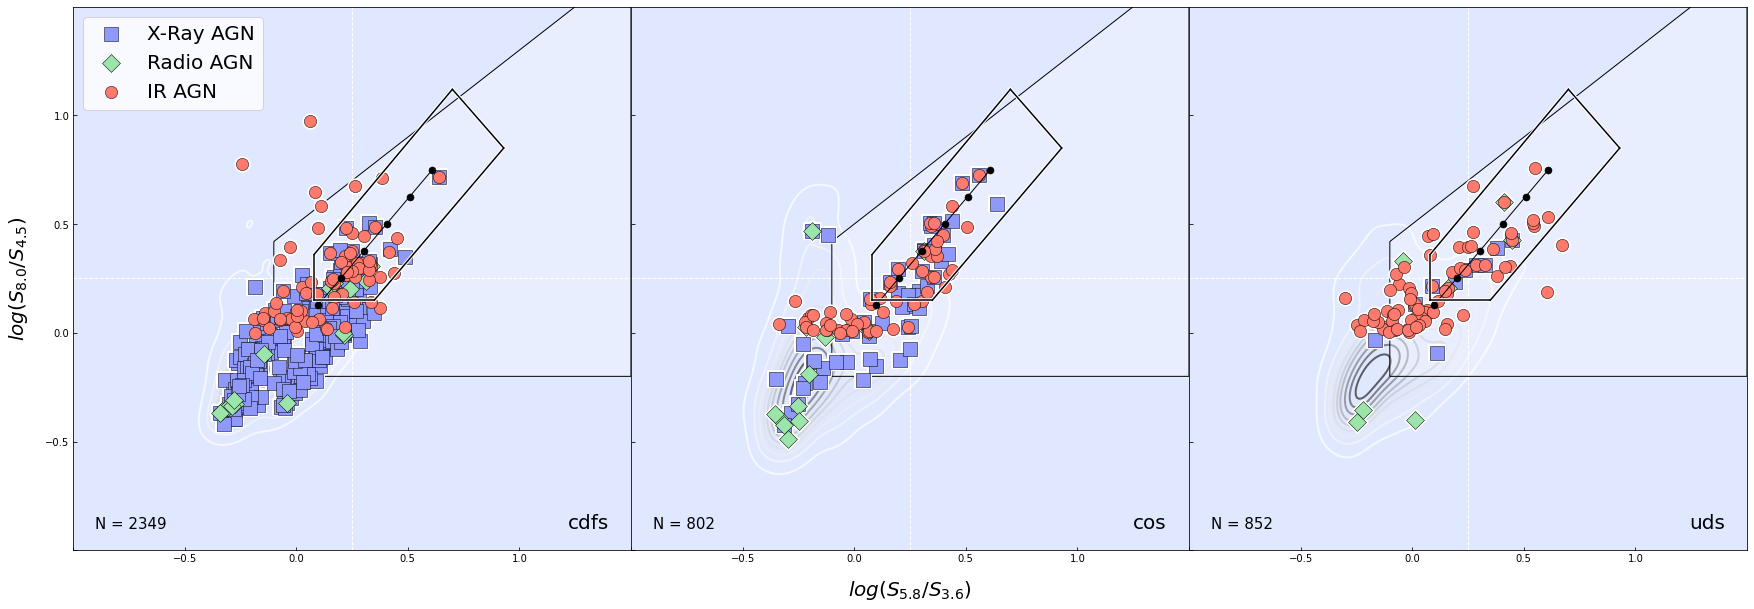

In [4]:
# ---------- Lacy Wedge (Donley; 3 x 1) ----------

# This plot utilises both the Lacy (outer boundaries) and Donley (inner locus) diagnostics for a SNR > 5 and use = 1 (see
# Straatman et al. (2016)) filtered population

fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, sharey = True, figsize = (30, 10))

plt.subplots_adjust(wspace = 0.0)



# ----- Plot Loops & Variable Stand-Ins -----

subplots = [ax1, ax2, ax3]

xd, yd = '58_36', '80_45'

xlim, ylim = [-1, 1.5], [-1, 1.5]
xtick, ytick = np.arange(-1, 1.5, 0.5), np.arange(-1, 1.5, 0.5)

x1 = np.linspace(-0.1, 1.5, 100)
y1, y2 = -0.2, 0.8 * x1 + 0.5



for dataset, ax, field in zip(datasets, subplots, fields):

    # ----- Density Loop -----

    sns.kdeplot(x = xd, y = yd, data = dataset[dataset['agn'] == 0], **kde_params, ax = ax)

    # ----- Scatter Loops -----

    for agn_type, w_param in zip(agn_types, w_params):

        ax.scatter(
            x = dataset.loc[dataset[agn_type] == 1, xd],
            y = dataset.loc[dataset[agn_type] == 1, yd],
            **w_param)
    
    for agn_type, rgb_param in zip(agn_types, rgb_params):
       
        ax.scatter(
            x = dataset.loc[dataset[agn_type] == 1, xd],
            y = dataset.loc[dataset[agn_type] == 1, yd],
            label = agn_labels.get(agn_type, agn_type), 
            **rgb_param)
        
    # ----- Aesthetics -----
    
    ax.set_xlim(xlim); ax.set_ylim(ylim)
    ax.set_xticks(xtick); ax.set_yticks(ytick)

    xticks = ax.xaxis.get_major_ticks(); yticks = ax.yaxis.get_major_ticks()
    xticks[0].label1.set_visible(False); yticks[0].label1.set_visible(False)

    ax.tick_params(axis = "x", direction = "in"); ax.tick_params(axis = "y", direction = "in")

    ax.set_facecolor('#e0e8ff')

    ax.axhline(0.25, color = 'w', linewidth = 1, linestyle = '--', zorder = 1); ax.axvline(0.25, color = 'w', linewidth = 1, linestyle = '--', zorder = 1)

    # ----- Lacy Diagnostic -----

    ax.fill_between(x1, y1, y2, color = 'w', alpha = 0.3, zorder = 2); ax.fill_between(x1, y1, y2, color = 'none', edgecolor = 'black', alpha = 1, zorder = 2)

    # ----- Donley Power-Law -----

    line_params_black = {'color': 'black', 'linewidth': 1.5, 'linestyle': '-', 'zorder': 5}
    line_params_white = {'color': 'white', 'linewidth': 3.5, 'linestyle': '-', 'zorder': 5}
    scatter_params = {'s': 50, 'color': 'black', 'marker': 'o', 'edgecolor': 'k', 'linewidth': 0.5, 'zorder': 5}

    ax.plot([0.1, 0.61], [0.13, 0.75], color = 'black', linewidth = 1, linestyle = '-', zorder = 5)

    ax.scatter([0.1, 0.202, 0.304, 0.406, 0.508, 0.61], [0.13, 0.254, 0.378, 0.502, 0.626, 0.75], **scatter_params)

    lines = [([0.35, 0.93], [0.15, 0.85]), ([0.93, 0.7], [0.85, 1.12]), ([0.7, 0.08], [1.12, 0.36]), ([0.08, 0.08], [0.36, 0.15]), ([0.08, 0.35], [0.15, 0.15])]

    for x, y in lines:
        ax.plot(x, y, **line_params_white)

    for x, y in lines:
        ax.plot(x, y, **line_params_black)

    # ----- Labels -----

    ax.text(1.4, -0.9, field, fontsize = 20, ha = 'right'); ax.text(-0.9, -0.9, f'N = {len(dataset)}', fontsize = 15, ha = 'left')

    ax1.set_xlabel(''); ax3.set_xlabel(''); ax1.yaxis.labelpad = 15; ax2.xaxis.labelpad = 15
    ax1.set_ylabel('$log (S_{8.0}/S_{4.5})$', size = '20'); ax2.set_xlabel('$log (S_{5.8}/S_{3.6})$', size = '20')

    ax1.legend(loc = 'upper left', fontsize = '20', frameon = True)


fig.savefig('/Users/jess/Desktop/diagnostic_plots/ir/lacy_donley_31_test.png', bbox_inches = 'tight', dpi = 300, transparent = False)

In [130]:
# ---------- Completeness and Reliability Calculations (Lacy; Vanilla) ----------



# ---------- AGN(SEL): No. of AGN residing within the diagnostic region ----------

# ----- Define Functions -----

def agn_sel_filter_criteria(df):
    return (df['58_36'] > -0.1) & (df['80_45'] > -0.2) & (df['80_45'] < 0.8 * df['58_36'] + 0.5)

def agn_sel(df, agn_type):
    return len(df[(df[agn_type] == 1) & agn_sel_filter_criteria(df)])

def agn_sel_binned(df, agn_type, z_bin):
    return len(df[(df[agn_type] == 1) & z_bin & agn_sel_filter_criteria(df)])



# ----- Complete Sample; Redshift Binned (IR Only); AGN(SEL) -----

cdfs_ir_sel, cdfs_radio_sel, cdfs_xray_sel = agn_sel(cdfs, 'ir_agn'), agn_sel(cdfs, 'radio_agn'), agn_sel(cdfs, 'xray_agn')
cos_ir_sel, cos_radio_sel, cos_xray_sel = agn_sel(cos, 'ir_agn'), agn_sel(cos, 'radio_agn'), agn_sel(cos, 'xray_agn')
uds_ir_sel, uds_radio_sel, uds_xray_sel = agn_sel(uds, 'ir_agn'), agn_sel(uds, 'radio_agn'), agn_sel(uds, 'xray_agn')

cdfs_ir_z01_sel, cdfs_ir_z12_sel, cdfs_ir_z23_sel, cdfs_ir_z34_sel, cdfs_ir_z4_sel = agn_sel_binned(cdfs, 'ir_agn', cdfs_z01), agn_sel_binned(cdfs, 'ir_agn', cdfs_z12), agn_sel_binned(cdfs, 'ir_agn', cdfs_z23), agn_sel_binned(cdfs, 'ir_agn', cdfs_z34), agn_sel_binned(cdfs, 'ir_agn', cdfs_z4)
cos_ir_z01_sel, cos_ir_z12_sel, cos_ir_z23_sel, cos_ir_z34_sel, cos_ir_z4_sel = agn_sel_binned(cos, 'ir_agn', cos_z01), agn_sel_binned(cos, 'ir_agn', cos_z12), agn_sel_binned(cos, 'ir_agn', cos_z23), agn_sel_binned(cos, 'ir_agn', cos_z34), agn_sel_binned(cos, 'ir_agn', cos_z4)
uds_ir_z01_sel, uds_ir_z12_sel, uds_ir_z23_sel, uds_ir_z34_sel, uds_ir_z4_sel = agn_sel_binned(uds, 'ir_agn', uds_z01), agn_sel_binned(uds, 'ir_agn', uds_z12), agn_sel_binned(uds, 'ir_agn', uds_z23), agn_sel_binned(uds, 'ir_agn', uds_z34), agn_sel_binned(uds, 'ir_agn', uds_z4)

cdfs_agn_sel = cdfs_ir_sel + cdfs_radio_sel + cdfs_xray_sel
cos_agn_sel = cos_ir_sel + cos_radio_sel + cos_xray_sel
uds_agn_sel = uds_ir_sel + uds_radio_sel + uds_xray_sel



# ---------- AGN(TOT): No. of AGN according to Michael ----------

# ----- Complete Sample; Redshift Binned (IR Only); AGN(TOT) -----

cdfs_m_ir_agn_tot, cdfs_m_radio_agn_tot, cdfs_m_xray_agn_tot = len(cdfs[(cdfs['ir_agn'] == 1)]), len(cdfs[(cdfs['radio_agn'] == 1)]), len(cdfs[(cdfs['xray_agn'] == 1)])
cos_m_ir_agn_tot, cos_m_radio_agn_tot, cos_m_xray_agn_tot = len(cos[(cos['ir_agn'] == 1)]), len(cos[(cos['radio_agn'] == 1)]), len(cos[(cos['xray_agn'] == 1)])
uds_m_ir_agn_tot, uds_m_radio_agn_tot, uds_m_xray_agn_tot = len(uds[(uds['ir_agn'] == 1)]), len(uds[(uds['radio_agn'] == 1)]), len(uds[(uds['xray_agn'] == 1)])

cdfs_m_ir_z01_agn_tot, cdfs_m_ir_z12_agn_tot, cdfs_m_ir_z23_agn_tot, cdfs_m_ir_z34_agn_tot, cdfs_m_ir_z4_agn_tot = len(cdfs[(cdfs['ir_agn'] == 1) & cdfs_z01]), len(cdfs[(cdfs['ir_agn'] == 1) & cdfs_z12]), len(cdfs[(cdfs['ir_agn'] == 1) & cdfs_z23]), len(cdfs[(cdfs['ir_agn'] == 1) & cdfs_z34]), len(cdfs[(cdfs['ir_agn'] == 1) & cdfs_z4])
cos_m_ir_z01_agn_tot, cos_m_ir_z12_agn_tot, cos_m_ir_z23_agn_tot, cos_m_ir_z34_agn_tot, cos_m_ir_z4_agn_tot = len(cos[(cos['ir_agn'] == 1) & cos_z01]), len(cos[(cos['ir_agn'] == 1) & cos_z12]), len(cos[(cos['ir_agn'] == 1) & cos_z23]), len(cos[(cos['ir_agn'] == 1) & cos_z34]), len(cos[(cos['ir_agn'] == 1) & cos_z4])
uds_m_ir_z01_agn_tot, uds_m_ir_z12_agn_tot, uds_m_ir_z23_agn_tot, uds_m_ir_z34_agn_tot, uds_m_ir_z4_agn_tot = len(uds[(uds['ir_agn'] == 1) & uds_z01]), len(uds[(uds['ir_agn'] == 1) & uds_z12]), len(uds[(uds['ir_agn'] == 1) & uds_z23]), len(uds[(uds['ir_agn'] == 1) & uds_z34]), len(uds[(uds['ir_agn'] == 1) & uds_z4])

cdfs_agn_tot_m = cdfs_m_ir_agn_tot + cdfs_m_radio_agn_tot + cdfs_m_xray_agn_tot
cos_agn_tot_m = cos_m_ir_agn_tot + cos_m_radio_agn_tot + cos_m_xray_agn_tot
uds_agn_tot_m = uds_m_ir_agn_tot + uds_m_radio_agn_tot + uds_m_xray_agn_tot



# ---------- N(SEL): No. of AGN + Non AGN Selected ----------

# ----- Define Functions -----

# Define reusable filter criteria for NIL AGN selection
def n_sel_filter_criteria(df):
    return (df['ir_agn'].isin([0, -1])) & (df['radio_agn'].isin([0, -1])) & (df['xray_agn'].isin([0, -1])) & \
           (df['58_36'] > -0.1) & (df['80_45'] > -0.2) & (df['80_45'] < 0.8 * df['58_36'] + 0.5)

# Define reusable filter criteria for IR-only NIL AGN selection
def ir_n_sel_filter_criteria(df):
    return (df['ir_agn'].isin([0, -1])) & (df['58_36'] > -0.1) & (df['80_45'] > -0.2) & \
           (df['80_45'] < 0.8 * df['58_36'] + 0.5)

# Apply filter criteria and count the selections
def n_sel(df, criteria_func):
    return len(df[criteria_func(df)])

# Apply filter criteria with redshift binning
def n_sel_binned(df, criteria_func, z_bin):
    return len(df[criteria_func(df) & z_bin])



# ----- Complete Sample; IR Only; Redshift Binned (IR Only) -----

cdfs_nil_nsel, cos_nil_nsel, uds_nil_nsel = n_sel(cdfs, n_sel_filter_criteria), n_sel(cos, n_sel_filter_criteria), n_sel(uds, n_sel_filter_criteria)

cdfs_ir_nil_nsel, cos_ir_nil_nsel, uds_ir_nil_nsel = n_sel(cdfs, ir_n_sel_filter_criteria), n_sel(cos, ir_n_sel_filter_criteria), n_sel(uds, ir_n_sel_filter_criteria)

cdfs_ir_z01_nil_nsel, cdfs_ir_z12_nil_nsel, cdfs_ir_z23_nil_nsel, cdfs_ir_z34_nil_nsel, cdfs_ir_z4_nil_nsel = n_sel_binned(cdfs, ir_n_sel_filter_criteria, cdfs_z01), n_sel_binned(cdfs, ir_n_sel_filter_criteria, cdfs_z12), n_sel_binned(cdfs, ir_n_sel_filter_criteria, cdfs_z23), n_sel_binned(cdfs, ir_n_sel_filter_criteria, cdfs_z34), n_sel_binned(cdfs, ir_n_sel_filter_criteria, cdfs_z4)
cos_ir_z01_nil_nsel, cos_ir_z12_nil_nsel, cos_ir_z23_nil_nsel, cos_ir_z34_nil_nsel, cos_ir_z4_nil_nsel = n_sel_binned(cos, ir_n_sel_filter_criteria, cos_z01), n_sel_binned(cos, ir_n_sel_filter_criteria, cos_z12), n_sel_binned(cos, ir_n_sel_filter_criteria, cos_z23), n_sel_binned(cos, ir_n_sel_filter_criteria, cos_z34), n_sel_binned(cos, ir_n_sel_filter_criteria, cos_z4)
uds_ir_z01_nil_nsel, uds_ir_z12_nil_nsel, uds_ir_z23_nil_nsel, uds_ir_z34_nil_nsel, uds_ir_z4_nil_nsel = n_sel_binned(uds, ir_n_sel_filter_criteria, uds_z01), n_sel_binned(uds, ir_n_sel_filter_criteria, uds_z12), n_sel_binned(uds, ir_n_sel_filter_criteria, uds_z23), n_sel_binned(uds, ir_n_sel_filter_criteria, uds_z34), n_sel_binned(uds, ir_n_sel_filter_criteria, uds_z4)

# ----- N(SEL) -----

cdfs_tot_nsel, cos_tot_nsel, uds_tot_nsel = cdfs_nil_nsel + cdfs_agn_sel, cos_nil_nsel + cos_agn_sel, uds_nil_nsel + uds_agn_sel

cdfs_ir_tot_nsel, cos_ir_tot_nsel, uds_ir_tot_nsel = cdfs_ir_nil_nsel + cdfs_ir_sel, cos_ir_nil_nsel + cos_ir_sel, uds_ir_nil_nsel + uds_ir_sel

cdfs_ir_z01_tot_nsel, cdfs_ir_z12_tot_nsel, cdfs_ir_z23_tot_nsel, cdfs_ir_z34_tot_nsel, cdfs_ir_z4_tot_nsel = cdfs_ir_z01_nil_nsel + cdfs_ir_z01_sel, cdfs_ir_z12_nil_nsel + cdfs_ir_z12_sel, cdfs_ir_z23_nil_nsel + cdfs_ir_z23_sel, cdfs_ir_z34_nil_nsel + cdfs_ir_z34_sel, cdfs_ir_z4_nil_nsel + cdfs_ir_z4_sel
cos_ir_z01_tot_nsel, cos_ir_z12_tot_nsel, cos_ir_z23_tot_nsel, cos_ir_z34_tot_nsel, cos_ir_z4_tot_nsel = cos_ir_z01_nil_nsel + cos_ir_z01_sel, cos_ir_z12_nil_nsel + cos_ir_z12_sel, cos_ir_z23_nil_nsel + cos_ir_z23_sel, cos_ir_z34_nil_nsel + cos_ir_z34_sel, cos_ir_z4_nil_nsel + cos_ir_z4_sel
uds_ir_z01_tot_nsel, uds_ir_z12_tot_nsel, uds_ir_z23_tot_nsel, uds_ir_z34_tot_nsel, uds_ir_z4_tot_nsel = uds_ir_z01_nil_nsel + uds_ir_z01_sel, uds_ir_z12_nil_nsel + uds_ir_z12_sel, uds_ir_z23_nil_nsel + uds_ir_z23_sel, uds_ir_z34_nil_nsel + uds_ir_z34_sel, uds_ir_z4_nil_nsel + uds_ir_z4_sel



# ---------- Completeness: AGN(SEL) / AGN(TOT) ----------

# ----- Complete Sample; IR Only; Redshift Binned (IR Only) -----

cdfs_com, cos_com, uds_com = cdfs_agn_sel / cdfs_agn_tot_m, cos_agn_sel / cos_agn_tot_m, uds_agn_sel / uds_agn_tot_m

cdfs_ir_com, cos_ir_com, uds_ir_com = cdfs_ir_sel / cdfs_m_ir_agn_tot, cos_ir_sel / cos_m_ir_agn_tot, uds_ir_sel / uds_m_ir_agn_tot

cdfs_ir_z01_com, cdfs_ir_z12_com, cdfs_ir_z23_com, cdfs_ir_z34_com, cdfs_ir_z4_com = cdfs_ir_z01_sel / cdfs_m_ir_z01_agn_tot, cdfs_ir_z12_sel / cdfs_m_ir_z12_agn_tot, cdfs_ir_z23_sel / cdfs_m_ir_z23_agn_tot, cdfs_ir_z34_sel / cdfs_m_ir_z34_agn_tot, cdfs_ir_z4_sel / cdfs_m_ir_z4_agn_tot
cos_ir_z01_com, cos_ir_z12_com, cos_ir_z23_com, cos_ir_z34_com, cos_ir_z4_com = cos_ir_z01_sel / cos_m_ir_z01_agn_tot, cos_ir_z12_sel / cos_m_ir_z12_agn_tot, cos_ir_z23_sel / cos_m_ir_z23_agn_tot, cos_ir_z34_sel / cos_m_ir_z34_agn_tot, cos_ir_z4_sel / cos_m_ir_z4_agn_tot
uds_ir_z01_com, uds_ir_z12_com, uds_ir_z23_com, uds_ir_z34_com, uds_ir_z4_com = uds_ir_z01_sel / uds_m_ir_z01_agn_tot, uds_ir_z12_sel / uds_m_ir_z12_agn_tot, uds_ir_z23_sel / uds_m_ir_z23_agn_tot, uds_ir_z34_sel / uds_m_ir_z34_agn_tot, uds_ir_z4_sel / uds_m_ir_z4_agn_tot



# ---------- Reliability: AGN(SEL) / N(SEL) ----------

# ----- Complete Sample; IR Only; Redshift Binned (IR Only) -----

cdfs_rel, cos_rel, uds_rel = cdfs_agn_sel / cdfs_tot_nsel, cos_agn_sel / cos_tot_nsel, uds_agn_sel / uds_tot_nsel

cdfs_ir_rel, cos_ir_rel, uds_ir_rel = cdfs_ir_sel / cdfs_ir_tot_nsel, cos_ir_sel / cos_ir_tot_nsel, uds_ir_sel / uds_ir_tot_nsel

cdfs_ir_z01_rel, cdfs_ir_z12_rel, cdfs_ir_z23_rel, cdfs_ir_z34_rel, cdfs_ir_z4_rel = cdfs_ir_z01_sel / cdfs_ir_z01_tot_nsel, cdfs_ir_z12_sel / cdfs_ir_z12_tot_nsel, cdfs_ir_z23_sel / cdfs_ir_z23_tot_nsel, cdfs_ir_z34_sel / cdfs_ir_z34_tot_nsel, cdfs_ir_z4_sel / cdfs_ir_z4_tot_nsel
cos_ir_z01_rel, cos_ir_z12_rel, cos_ir_z23_rel, cos_ir_z34_rel, cos_ir_z4_rel = cos_ir_z01_sel / cos_ir_z01_tot_nsel, cos_ir_z12_sel / cos_ir_z12_tot_nsel, cos_ir_z23_sel / cos_ir_z23_tot_nsel, cos_ir_z34_sel / cos_ir_z34_tot_nsel, cos_ir_z4_sel / cos_ir_z4_tot_nsel
uds_ir_z01_rel, uds_ir_z12_rel, uds_ir_z23_rel, uds_ir_z34_rel, uds_ir_z4_rel = uds_ir_z01_sel / uds_ir_z01_tot_nsel, uds_ir_z12_sel / uds_ir_z12_tot_nsel, uds_ir_z23_sel / uds_ir_z23_tot_nsel, uds_ir_z34_sel / uds_ir_z34_tot_nsel, uds_ir_z4_sel / uds_ir_z4_tot_nsel



# ---------- Print Results ----------

# ----- Complete Sample; IR Only; Redshift Binned (IR Only) -----

print('---------- Lacy; Vanilla ----------'); print('\n')

print('----- Complete Sample -----'); print('\n')
print(f'Completeness: CDFS = {cdfs_com * 100:.2f}%, COSMOS = {cos_com * 100:.2f}%, UDS = {uds_com * 100:.2f}%'); print(f'Reliability: CDFS = {cdfs_rel * 100:.2f}%, COSMOS = {cos_rel * 100:.2f}%, UDS = {uds_rel * 100:.2f}%'); print('\n')

print('----- IR Only -----'); print('\n')
print(f'Completeness (IR): CDFS = {cdfs_ir_com * 100:.2f}%, COSMOS = {cos_ir_com * 100:.2f}%, UDS = {uds_ir_com * 100:.2f}%'); print(f'Reliability (IR): CDFS = {cdfs_ir_rel * 100:.2f}%, COSMOS = {cos_ir_rel * 100:.2f}%, UDS = {uds_ir_rel * 100:.2f}%'); print('\n')

print('----- Redshift Binned (IR Only) -----'); print('\n')

print('For [0 < z < 1]'); print('\n')
print(f'Completeness (IR, 0 < z < 1): CDFS = {cdfs_ir_z01_com * 100:.2f}%, COSMOS = {cos_ir_z01_com * 100:.2f}%, UDS = {uds_ir_z01_com * 100:.2f}%'); print(f'Reliability (IR, 0 < z < 1): CDFS = {cdfs_ir_z01_rel * 100:.2f}%, COSMOS = {cos_ir_z01_rel * 100:.2f}%, UDS = {uds_ir_z01_rel * 100:.2f}%'); print('\n')

print('For [1 < z < 2]'); print('\n')
print(f'Completeness (IR, 1 < z < 2): CDFS = {cdfs_ir_z12_com * 100:.2f}%, COSMOS = {cos_ir_z12_com * 100:.2f}%, UDS = {uds_ir_z12_com * 100:.2f}%'); print(f'Reliability (IR, 1 < z < 2): CDFS = {cdfs_ir_z12_rel * 100:.2f}%, COSMOS = {cos_ir_z12_rel * 100:.2f}%, UDS = {uds_ir_z12_rel * 100:.2f}%'); print('\n')

print('FOr [2 < z < 3]'); print('\n')
print(f'Completeness (IR, 2 < z < 3): CDFS = {cdfs_ir_z23_com * 100:.2f}%, COSMOS = {cos_ir_z23_com * 100:.2f}%, UDS = {uds_ir_z23_com * 100:.2f}%'); print(f'Reliability (IR, 2 < z < 3): CDFS = {cdfs_ir_z23_rel * 100:.2f}%, COSMOS = {cos_ir_z23_rel * 100:.2f}%, UDS = {uds_ir_z23_rel * 100:.2f}%'); print('\n')

print('For [3 < z < 4]'); print('\n')
print(f'Completeness (IR, 3 < z < 4): CDFS = {cdfs_ir_z34_com * 100:.2f}%, COSMOS = {cos_ir_z34_com * 100:.2f}%, UDS = {uds_ir_z34_com * 100:.2f}%'); print(f'Reliability (IR, 3 < z < 4): CDFS = {cdfs_ir_z34_rel * 100:.2f}%, COSMOS = {cos_ir_z34_rel * 100:.2f}%, UDS = {uds_ir_z34_rel * 100:.2f}%'); print('\n')

print('For [z > 4]'); print('\n')
print(f'Completeness (IR, z > 4): CDFS = {cdfs_ir_z4_com * 100:.2f}%, COSMOS = {cos_ir_z4_com * 100:.2f}%, UDS = {uds_ir_z4_com * 100:.2f}%'); print(f'Reliability (IR, z > 4): CDFS = {cdfs_ir_z4_rel * 100:.2f}%, COSMOS = {cos_ir_z4_rel * 100:.2f}%, UDS = {uds_ir_z4_rel * 100:.2f}%')

---------- Lacy; Vanilla ----------


----- Complete Sample -----


Completeness: CDFS = 62.50%, COSMOS = 69.84%, UDS = 82.98%
Reliability: CDFS = 22.08%, COSMOS = 33.72%, UDS = 20.31%


----- IR Only -----


Completeness (IR): CDFS = 87.84%, COSMOS = 77.59%, UDS = 84.42%
Reliability (IR): CDFS = 7.44%, COSMOS = 18.67%, UDS = 17.33%


----- Redshift Binned (IR Only) -----


For [0 < z < 1]


Completeness (IR, 0 < z < 1): CDFS = 76.19%, COSMOS = 56.25%, UDS = 73.91%
Reliability (IR, 0 < z < 1): CDFS = 26.23%, COSMOS = 19.57%, UDS = 16.83%


For [1 < z < 2]


Completeness (IR, 1 < z < 2): CDFS = 86.96%, COSMOS = 80.00%, UDS = 84.21%
Reliability (IR, 1 < z < 2): CDFS = 7.27%, COSMOS = 23.30%, UDS = 19.51%


FOr [2 < z < 3]


Completeness (IR, 2 < z < 3): CDFS = 100.00%, COSMOS = 100.00%, UDS = 100.00%
Reliability (IR, 2 < z < 3): CDFS = 4.68%, COSMOS = 9.64%, UDS = 10.13%


For [3 < z < 4]


Completeness (IR, 3 < z < 4): CDFS = 83.33%, COSMOS = 100.00%, UDS = 100.00%
Reliability (IR, 3 < 

In [131]:
# ---------- Completeness and Reliability Calculations (Lacy; Donley) ----------



# ---------- AGN(SEL): No. of AGN residing within the diagnostic region ----------

# ----- Define Functions -----

def agn_sel_filter_criteria(df):
    return (df['58_36'] > 0.08) & (df['80_45'] > 0.15) & (df['80_45'] > ((1.12 * df['58_36']) - 0.27)) & (df['58_36'] < ((1.12 * df['58_36']) + 0.27))

def agn_sel(df, agn_type):
    return len(df[(df[agn_type] == 1) & agn_sel_filter_criteria(df)])

def agn_sel_binned(df, agn_type, z_bin):
    return len(df[(df[agn_type] == 1) & z_bin & agn_sel_filter_criteria(df)])



# ----- Complete Sample; Redshift Binned (IR Only); AGN(SEL) -----

cdfs_ir_sel, cdfs_radio_sel, cdfs_xray_sel = agn_sel(cdfs, 'ir_agn'), agn_sel(cdfs, 'radio_agn'), agn_sel(cdfs, 'xray_agn')
cos_ir_sel, cos_radio_sel, cos_xray_sel = agn_sel(cos, 'ir_agn'), agn_sel(cos, 'radio_agn'), agn_sel(cos, 'xray_agn')
uds_ir_sel, uds_radio_sel, uds_xray_sel = agn_sel(uds, 'ir_agn'), agn_sel(uds, 'radio_agn'), agn_sel(uds, 'xray_agn')

cdfs_ir_z01_sel, cdfs_ir_z12_sel, cdfs_ir_z23_sel, cdfs_ir_z34_sel, cdfs_ir_z4_sel = agn_sel_binned(cdfs, 'ir_agn', cdfs_z01), agn_sel_binned(cdfs, 'ir_agn', cdfs_z12), agn_sel_binned(cdfs, 'ir_agn', cdfs_z23), agn_sel_binned(cdfs, 'ir_agn', cdfs_z34), agn_sel_binned(cdfs, 'ir_agn', cdfs_z4)
cos_ir_z01_sel, cos_ir_z12_sel, cos_ir_z23_sel, cos_ir_z34_sel, cos_ir_z4_sel = agn_sel_binned(cos, 'ir_agn', cos_z01), agn_sel_binned(cos, 'ir_agn', cos_z12), agn_sel_binned(cos, 'ir_agn', cos_z23), agn_sel_binned(cos, 'ir_agn', cos_z34), agn_sel_binned(cos, 'ir_agn', cos_z4)
uds_ir_z01_sel, uds_ir_z12_sel, uds_ir_z23_sel, uds_ir_z34_sel, uds_ir_z4_sel = agn_sel_binned(uds, 'ir_agn', uds_z01), agn_sel_binned(uds, 'ir_agn', uds_z12), agn_sel_binned(uds, 'ir_agn', uds_z23), agn_sel_binned(uds, 'ir_agn', uds_z34), agn_sel_binned(uds, 'ir_agn', uds_z4)

cdfs_agn_sel = cdfs_ir_sel + cdfs_radio_sel + cdfs_xray_sel
cos_agn_sel = cos_ir_sel + cos_radio_sel + cos_xray_sel
uds_agn_sel = uds_ir_sel + uds_radio_sel + uds_xray_sel



# ---------- AGN(TOT): No. of AGN according to Michael ----------

# ----- Complete Sample; Redshift Binned (IR Only); AGN(TOT) -----

cdfs_m_ir_agn_tot, cdfs_m_radio_agn_tot, cdfs_m_xray_agn_tot = len(cdfs[(cdfs['ir_agn'] == 1)]), len(cdfs[(cdfs['radio_agn'] == 1)]), len(cdfs[(cdfs['xray_agn'] == 1)])
cos_m_ir_agn_tot, cos_m_radio_agn_tot, cos_m_xray_agn_tot = len(cos[(cos['ir_agn'] == 1)]), len(cos[(cos['radio_agn'] == 1)]), len(cos[(cos['xray_agn'] == 1)])
uds_m_ir_agn_tot, uds_m_radio_agn_tot, uds_m_xray_agn_tot = len(uds[(uds['ir_agn'] == 1)]), len(uds[(uds['radio_agn'] == 1)]), len(uds[(uds['xray_agn'] == 1)])

cdfs_m_ir_z01_agn_tot, cdfs_m_ir_z12_agn_tot, cdfs_m_ir_z23_agn_tot, cdfs_m_ir_z34_agn_tot, cdfs_m_ir_z4_agn_tot = len(cdfs[(cdfs['ir_agn'] == 1) & cdfs_z01]), len(cdfs[(cdfs['ir_agn'] == 1) & cdfs_z12]), len(cdfs[(cdfs['ir_agn'] == 1) & cdfs_z23]), len(cdfs[(cdfs['ir_agn'] == 1) & cdfs_z34]), len(cdfs[(cdfs['ir_agn'] == 1) & cdfs_z4])
cos_m_ir_z01_agn_tot, cos_m_ir_z12_agn_tot, cos_m_ir_z23_agn_tot, cos_m_ir_z34_agn_tot, cos_m_ir_z4_agn_tot = len(cos[(cos['ir_agn'] == 1) & cos_z01]), len(cos[(cos['ir_agn'] == 1) & cos_z12]), len(cos[(cos['ir_agn'] == 1) & cos_z23]), len(cos[(cos['ir_agn'] == 1) & cos_z34]), len(cos[(cos['ir_agn'] == 1) & cos_z4])
uds_m_ir_z01_agn_tot, uds_m_ir_z12_agn_tot, uds_m_ir_z23_agn_tot, uds_m_ir_z34_agn_tot, uds_m_ir_z4_agn_tot = len(uds[(uds['ir_agn'] == 1) & uds_z01]), len(uds[(uds['ir_agn'] == 1) & uds_z12]), len(uds[(uds['ir_agn'] == 1) & uds_z23]), len(uds[(uds['ir_agn'] == 1) & uds_z34]), len(uds[(uds['ir_agn'] == 1) & uds_z4])

cdfs_agn_tot_m = cdfs_m_ir_agn_tot + cdfs_m_radio_agn_tot + cdfs_m_xray_agn_tot
cos_agn_tot_m = cos_m_ir_agn_tot + cos_m_radio_agn_tot + cos_m_xray_agn_tot
uds_agn_tot_m = uds_m_ir_agn_tot + uds_m_radio_agn_tot + uds_m_xray_agn_tot



# ---------- N(SEL): No. of AGN + Non AGN Selected ----------

# ----- Define Functions -----

# Define reusable filter criteria for NIL AGN selection
def n_sel_filter_criteria(df):
    return (df['ir_agn'].isin([0, -1])) & (df['radio_agn'].isin([0, -1])) & (df['xray_agn'].isin([0, -1])) & \
           (df['58_36'] > 0.08) & (df['80_45'] > 0.15) & (df['80_45'] > ((1.12 * df['58_36']) - 0.27)) & (df['58_36'] < ((1.12 * df['58_36']) + 0.27))

# Define reusable filter criteria for IR-only NIL AGN selection
def ir_n_sel_filter_criteria(df):
    return (df['ir_agn'].isin([0, -1])) & (df['58_36'] > 0.08) & (df['80_45'] > 0.15) & (df['80_45'] > ((1.12 * df['58_36']) - 0.27)) & (df['58_36'] < ((1.12 * df['58_36']) + 0.27))

# Apply filter criteria and count the selections
def n_sel(df, criteria_func):
    return len(df[criteria_func(df)])

# Apply filter criteria with redshift binning
def n_sel_binned(df, criteria_func, z_bin):
    return len(df[criteria_func(df) & z_bin])



# ----- Complete Sample; IR Only; Redshift Binned (IR Only) -----

cdfs_nil_nsel, cos_nil_nsel, uds_nil_nsel = n_sel(cdfs, n_sel_filter_criteria), n_sel(cos, n_sel_filter_criteria), n_sel(uds, n_sel_filter_criteria)

cdfs_ir_nil_nsel, cos_ir_nil_nsel, uds_ir_nil_nsel = n_sel(cdfs, ir_n_sel_filter_criteria), n_sel(cos, ir_n_sel_filter_criteria), n_sel(uds, ir_n_sel_filter_criteria)

cdfs_ir_z01_nil_nsel, cdfs_ir_z12_nil_nsel, cdfs_ir_z23_nil_nsel, cdfs_ir_z34_nil_nsel, cdfs_ir_z4_nil_nsel = n_sel_binned(cdfs, ir_n_sel_filter_criteria, cdfs_z01), n_sel_binned(cdfs, ir_n_sel_filter_criteria, cdfs_z12), n_sel_binned(cdfs, ir_n_sel_filter_criteria, cdfs_z23), n_sel_binned(cdfs, ir_n_sel_filter_criteria, cdfs_z34), n_sel_binned(cdfs, ir_n_sel_filter_criteria, cdfs_z4)
cos_ir_z01_nil_nsel, cos_ir_z12_nil_nsel, cos_ir_z23_nil_nsel, cos_ir_z34_nil_nsel, cos_ir_z4_nil_nsel = n_sel_binned(cos, ir_n_sel_filter_criteria, cos_z01), n_sel_binned(cos, ir_n_sel_filter_criteria, cos_z12), n_sel_binned(cos, ir_n_sel_filter_criteria, cos_z23), n_sel_binned(cos, ir_n_sel_filter_criteria, cos_z34), n_sel_binned(cos, ir_n_sel_filter_criteria, cos_z4)
uds_ir_z01_nil_nsel, uds_ir_z12_nil_nsel, uds_ir_z23_nil_nsel, uds_ir_z34_nil_nsel, uds_ir_z4_nil_nsel = n_sel_binned(uds, ir_n_sel_filter_criteria, uds_z01), n_sel_binned(uds, ir_n_sel_filter_criteria, uds_z12), n_sel_binned(uds, ir_n_sel_filter_criteria, uds_z23), n_sel_binned(uds, ir_n_sel_filter_criteria, uds_z34), n_sel_binned(uds, ir_n_sel_filter_criteria, uds_z4)

# ----- N(SEL) -----

cdfs_tot_nsel, cos_tot_nsel, uds_tot_nsel = cdfs_nil_nsel + cdfs_agn_sel, cos_nil_nsel + cos_agn_sel, uds_nil_nsel + uds_agn_sel

cdfs_ir_tot_nsel, cos_ir_tot_nsel, uds_ir_tot_nsel = cdfs_ir_nil_nsel + cdfs_ir_sel, cos_ir_nil_nsel + cos_ir_sel, uds_ir_nil_nsel + uds_ir_sel

cdfs_ir_z01_tot_nsel, cdfs_ir_z12_tot_nsel, cdfs_ir_z23_tot_nsel, cdfs_ir_z34_tot_nsel, cdfs_ir_z4_tot_nsel = cdfs_ir_z01_nil_nsel + cdfs_ir_z01_sel, cdfs_ir_z12_nil_nsel + cdfs_ir_z12_sel, cdfs_ir_z23_nil_nsel + cdfs_ir_z23_sel, cdfs_ir_z34_nil_nsel + cdfs_ir_z34_sel, cdfs_ir_z4_nil_nsel + cdfs_ir_z4_sel
cos_ir_z01_tot_nsel, cos_ir_z12_tot_nsel, cos_ir_z23_tot_nsel, cos_ir_z34_tot_nsel, cos_ir_z4_tot_nsel = cos_ir_z01_nil_nsel + cos_ir_z01_sel, cos_ir_z12_nil_nsel + cos_ir_z12_sel, cos_ir_z23_nil_nsel + cos_ir_z23_sel, cos_ir_z34_nil_nsel + cos_ir_z34_sel, cos_ir_z4_nil_nsel + cos_ir_z4_sel
uds_ir_z01_tot_nsel, uds_ir_z12_tot_nsel, uds_ir_z23_tot_nsel, uds_ir_z34_tot_nsel, uds_ir_z4_tot_nsel = uds_ir_z01_nil_nsel + uds_ir_z01_sel, uds_ir_z12_nil_nsel + uds_ir_z12_sel, uds_ir_z23_nil_nsel + uds_ir_z23_sel, uds_ir_z34_nil_nsel + uds_ir_z34_sel, uds_ir_z4_nil_nsel + uds_ir_z4_sel



# ---------- Completeness: AGN(SEL) / AGN(TOT) ----------

# ----- Complete Sample; IR Only; Redshift Binned (IR Only) -----

cdfs_com, cos_com, uds_com = cdfs_agn_sel / cdfs_agn_tot_m, cos_agn_sel / cos_agn_tot_m, uds_agn_sel / uds_agn_tot_m

cdfs_ir_com, cos_ir_com, uds_ir_com = cdfs_ir_sel / cdfs_m_ir_agn_tot, cos_ir_sel / cos_m_ir_agn_tot, uds_ir_sel / uds_m_ir_agn_tot

cdfs_ir_z01_com, cdfs_ir_z12_com, cdfs_ir_z23_com, cdfs_ir_z34_com, cdfs_ir_z4_com = cdfs_ir_z01_sel / cdfs_m_ir_z01_agn_tot, cdfs_ir_z12_sel / cdfs_m_ir_z12_agn_tot, cdfs_ir_z23_sel / cdfs_m_ir_z23_agn_tot, cdfs_ir_z34_sel / cdfs_m_ir_z34_agn_tot, cdfs_ir_z4_sel / cdfs_m_ir_z4_agn_tot
cos_ir_z01_com, cos_ir_z12_com, cos_ir_z23_com, cos_ir_z34_com, cos_ir_z4_com = cos_ir_z01_sel / cos_m_ir_z01_agn_tot, cos_ir_z12_sel / cos_m_ir_z12_agn_tot, cos_ir_z23_sel / cos_m_ir_z23_agn_tot, cos_ir_z34_sel / cos_m_ir_z34_agn_tot, cos_ir_z4_sel / cos_m_ir_z4_agn_tot
uds_ir_z01_com, uds_ir_z12_com, uds_ir_z23_com, uds_ir_z34_com, uds_ir_z4_com = uds_ir_z01_sel / uds_m_ir_z01_agn_tot, uds_ir_z12_sel / uds_m_ir_z12_agn_tot, uds_ir_z23_sel / uds_m_ir_z23_agn_tot, uds_ir_z34_sel / uds_m_ir_z34_agn_tot, uds_ir_z4_sel / uds_m_ir_z4_agn_tot



# ---------- Reliability: AGN(SEL) / N(SEL) ----------

# ----- Complete Sample; IR Only; Redshift Binned (IR Only) -----

cdfs_rel, cos_rel, uds_rel = cdfs_agn_sel / cdfs_tot_nsel, cos_agn_sel / cos_tot_nsel, uds_agn_sel / uds_tot_nsel

cdfs_ir_rel, cos_ir_rel, uds_ir_rel = cdfs_ir_sel / cdfs_ir_tot_nsel, cos_ir_sel / cos_ir_tot_nsel, uds_ir_sel / uds_ir_tot_nsel

cdfs_ir_z01_rel, cdfs_ir_z12_rel, cdfs_ir_z23_rel, cdfs_ir_z34_rel, cdfs_ir_z4_rel = cdfs_ir_z01_sel / cdfs_ir_z01_tot_nsel, cdfs_ir_z12_sel / cdfs_ir_z12_tot_nsel, cdfs_ir_z23_sel / cdfs_ir_z23_tot_nsel, cdfs_ir_z34_sel / cdfs_ir_z34_tot_nsel, cdfs_ir_z4_sel / cdfs_ir_z4_tot_nsel
cos_ir_z01_rel, cos_ir_z12_rel, cos_ir_z23_rel, cos_ir_z34_rel, cos_ir_z4_rel = cos_ir_z01_sel / cos_ir_z01_tot_nsel, cos_ir_z12_sel / cos_ir_z12_tot_nsel, cos_ir_z23_sel / cos_ir_z23_tot_nsel, cos_ir_z34_sel / cos_ir_z34_tot_nsel, cos_ir_z4_sel / cos_ir_z4_tot_nsel
uds_ir_z01_rel, uds_ir_z12_rel, uds_ir_z23_rel, uds_ir_z34_rel, uds_ir_z4_rel = uds_ir_z01_sel / uds_ir_z01_tot_nsel, uds_ir_z12_sel / uds_ir_z12_tot_nsel, uds_ir_z23_sel / uds_ir_z23_tot_nsel, uds_ir_z34_sel / uds_ir_z34_tot_nsel, uds_ir_z4_sel / uds_ir_z4_tot_nsel



# ---------- Print Results ----------

# ----- Complete Sample; IR Only; Redshift Binned (IR Only) -----

print('---------- Lacy; Donley ----------'); print('\n')

print('----- Complete Sample -----'); print('\n')
print(f'Completeness: CDFS = {cdfs_com * 100:.2f}%, COSMOS = {cos_com * 100:.2f}%, UDS = {uds_com * 100:.2f}%'); print(f'Reliability: CDFS = {cdfs_rel * 100:.2f}%, COSMOS = {cos_rel * 100:.2f}%, UDS = {uds_rel * 100:.2f}%'); print('\n')

print('----- IR Only -----'); print('\n')
print(f'Completeness (IR): CDFS = {cdfs_ir_com * 100:.2f}%, COSMOS = {cos_ir_com * 100:.2f}%, UDS = {uds_ir_com * 100:.2f}%'); print(f'Reliability (IR): CDFS = {cdfs_ir_rel * 100:.2f}%, COSMOS = {cos_ir_rel * 100:.2f}%, UDS = {uds_ir_rel * 100:.2f}%'); print('\n')

print('----- Redshift Binned (IR Only) -----'); print('\n')

print('For [0 < z < 1]'); print('\n')
print(f'Completeness (IR, 0 < z < 1): CDFS = {cdfs_ir_z01_com * 100:.2f}%, COSMOS = {cos_ir_z01_com * 100:.2f}%, UDS = {uds_ir_z01_com * 100:.2f}%'); print(f'Reliability (IR, 0 < z < 1): CDFS = {cdfs_ir_z01_rel * 100:.2f}%, COSMOS = {cos_ir_z01_rel * 100:.2f}%, UDS = {uds_ir_z01_rel * 100:.2f}%'); print('\n')

print('For [1 < z < 2]'); print('\n')
print(f'Completeness (IR, 1 < z < 2): CDFS = {cdfs_ir_z12_com * 100:.2f}%, COSMOS = {cos_ir_z12_com * 100:.2f}%, UDS = {uds_ir_z12_com * 100:.2f}%'); print(f'Reliability (IR, 1 < z < 2): CDFS = {cdfs_ir_z12_rel * 100:.2f}%, COSMOS = {cos_ir_z12_rel * 100:.2f}%, UDS = {uds_ir_z12_rel * 100:.2f}%'); print('\n')

print('FOr [2 < z < 3]'); print('\n')
print(f'Completeness (IR, 2 < z < 3): CDFS = {cdfs_ir_z23_com * 100:.2f}%, COSMOS = {cos_ir_z23_com * 100:.2f}%, UDS = {uds_ir_z23_com * 100:.2f}%'); print(f'Reliability (IR, 2 < z < 3): CDFS = {cdfs_ir_z23_rel * 100:.2f}%, COSMOS = {cos_ir_z23_rel * 100:.2f}%, UDS = {uds_ir_z23_rel * 100:.2f}%'); print('\n')

print('For [3 < z < 4]'); print('\n')
print(f'Completeness (IR, 3 < z < 4): CDFS = {cdfs_ir_z34_com * 100:.2f}%, COSMOS = {cos_ir_z34_com * 100:.2f}%, UDS = {uds_ir_z34_com * 100:.2f}%'); print(f'Reliability (IR, 3 < z < 4): CDFS = {cdfs_ir_z34_rel * 100:.2f}%, COSMOS = {cos_ir_z34_rel * 100:.2f}%, UDS = {uds_ir_z34_rel * 100:.2f}%'); print('\n')

print('For [z > 4]'); print('\n')
print(f'Completeness (IR, z > 4): CDFS = {cdfs_ir_z4_com * 100:.2f}%, COSMOS = {cos_ir_z4_com * 100:.2f}%, UDS = {uds_ir_z4_com * 100:.2f}%'); print(f'Reliability (IR, z > 4): CDFS = {cdfs_ir_z4_rel * 100:.2f}%, COSMOS = {cos_ir_z4_rel * 100:.2f}%, UDS = {uds_ir_z4_rel * 100:.2f}%')

---------- Lacy; Donley ----------


----- Complete Sample -----


Completeness: CDFS = 26.25%, COSMOS = 38.89%, UDS = 39.36%
Reliability: CDFS = 57.93%, COSMOS = 77.78%, UDS = 45.68%


----- IR Only -----


Completeness (IR): CDFS = 52.70%, COSMOS = 44.83%, UDS = 35.06%
Reliability (IR): CDFS = 31.71%, COSMOS = 52.00%, UDS = 36.99%


----- Redshift Binned (IR Only) -----


For [0 < z < 1]


Completeness (IR, 0 < z < 1): CDFS = 38.10%, COSMOS = 37.50%, UDS = 30.43%
Reliability (IR, 0 < z < 1): CDFS = 66.67%, COSMOS = 85.71%, UDS = 63.64%


For [1 < z < 2]


Completeness (IR, 1 < z < 2): CDFS = 34.78%, COSMOS = 30.00%, UDS = 18.42%
Reliability (IR, 1 < z < 2): CDFS = 61.54%, COSMOS = 75.00%, UDS = 53.85%


FOr [2 < z < 3]


Completeness (IR, 2 < z < 3): CDFS = 61.11%, COSMOS = 87.50%, UDS = 87.50%
Reliability (IR, 2 < z < 3): CDFS = 25.00%, COSMOS = 30.43%, UDS = 28.00%


For [3 < z < 4]


Completeness (IR, 3 < z < 4): CDFS = 100.00%, COSMOS = 100.00%, UDS = 66.67%
Reliability (IR, 3 < 

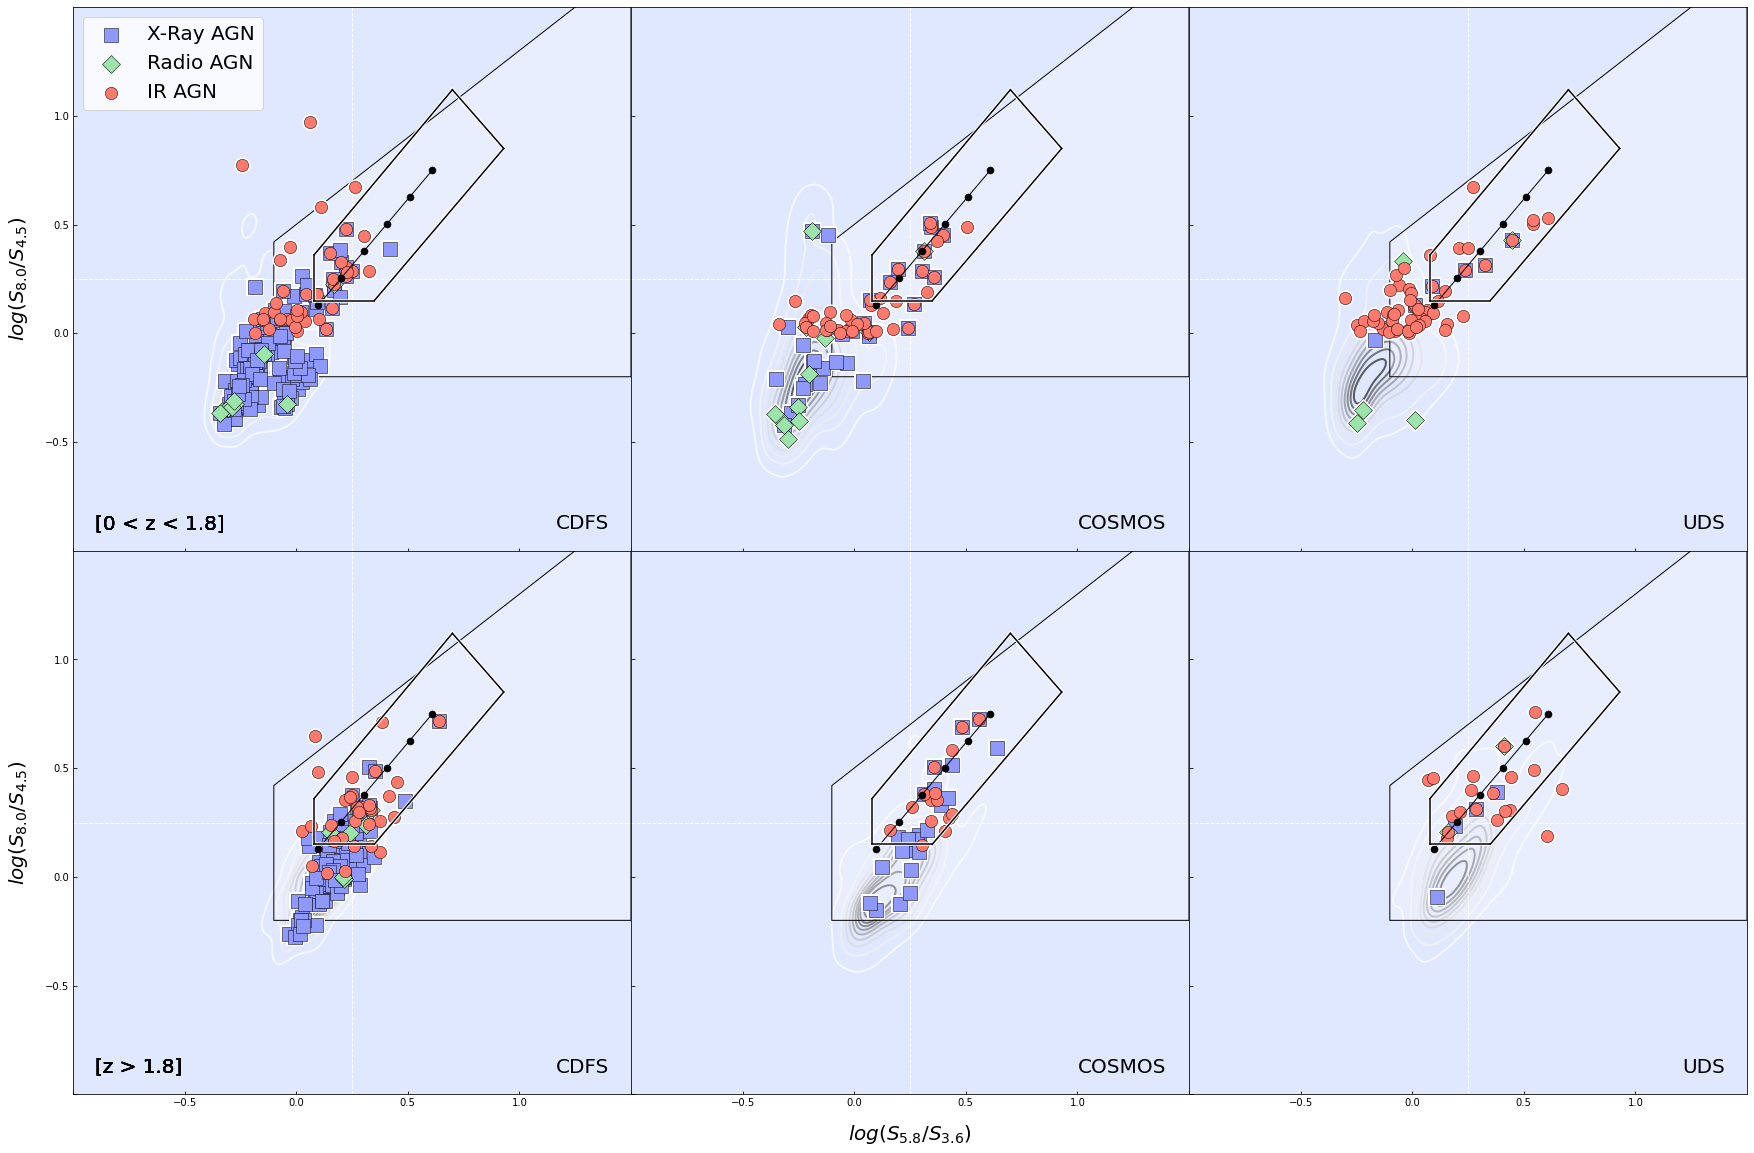

In [7]:
# ---------- Lacy Wedge (Donley; 3 x 2) ----------

# This plot utilises both the Lacy (outer boundaries) and Donley (inner locus) diagnostics for a SNR > 5 and use = 1 (see
# Straatman et al. (2016)) filtered population, with the addition of z = 0 - 1.8 and z > 1.8 redshfit bins which reflect 
# those used in Messias et al. (2012).

fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows = 2, ncols = 3, sharey = True, sharex = True, figsize = (30, 20))

plt.subplots_adjust(wspace = 0.0); plt.subplots_adjust(hspace = 0.0)


# ----- Plot Loops & Variable Stand-Ins -----

subplots = [ax1, ax2, ax3, ax4, ax5, ax6]
kde_datasets = [(cdfs, cdfs_bel_18, ax1), (cdfs, cdfs_abo_18, ax4), (cos, cos_bel_18, ax2), (cos, cos_abo_18, ax5), (uds, uds_bel_18, ax3), (uds, uds_abo_18, ax6)]

xd, yd = '58_36', '80_45'

xlim, ylim = [-1, 1.5], [-1, 1.5]
xtick, ytick = np.arange(-1, 1.5, 0.5), np.arange(-1, 1.5, 0.5)

x1 = np.linspace(-0.1, 1.5, 100)
y1, y2 = -0.2, 0.8 * x1 + 0.5



# ----- Density Loop -----

for data, condition, ax in kde_datasets:
    sns.kdeplot(x = xd, y = yd, data = data[(data['agn'] == 0) & condition], **kde_params, ax=ax)



# ----- Scatter Loop -----
    
field_subplots =[(ax1, ax4), (ax2, ax5), (ax3, ax6)]
field_z_values = [(cdfs_bel_18, cdfs_abo_18), (cos_bel_18, cos_abo_18), (uds_bel_18, uds_abo_18)]


for dataset, subplot_list, z_value_list in zip(datasets, field_subplots, field_z_values):

    for ax, z_value in zip(subplot_list, z_value_list):

        for column_name, w_param in zip(agn_types, w_params):

            ax.scatter(
                x = dataset.loc[(dataset[column_name] == 1) & z_value, xd],
                y = dataset.loc[(dataset[column_name] == 1) & z_value, yd],
                **w_param)
            
        for column_name, rgb_param in zip(agn_types, rgb_params):

            ax.scatter(
                x = dataset.loc[(dataset[column_name] == 1) & z_value, xd],
                y = dataset.loc[(dataset[column_name] == 1) & z_value, yd],
                label = agn_labels.get(column_name, column_name), 
                **rgb_param)



# ----- Plot Visuals -----

labels = ['CDFS', 'COSMOS', 'UDS']  # The correct labels for the fields
label_indices = [0, 1, 2, 0, 1, 2]  # Indices to match labels to the correct axes
    

for dataset, ax, label_index in zip(datasets * 2, subplots, label_indices):

    field = labels[label_index]
        
    # ----- Aesthetics -----
    
    ax.set_xlim(xlim); ax.set_ylim(ylim)
    ax.set_xticks(xtick); ax.set_yticks(ytick)

    xticks = ax.xaxis.get_major_ticks(); yticks = ax.yaxis.get_major_ticks()
    xticks[0].label1.set_visible(False); yticks[0].label1.set_visible(False)

    ax.tick_params(axis = "x", direction = "in"); ax.tick_params(axis = "y", direction = "in")

    ax.set_facecolor('#e0e8ff')

    ax.axhline(0.25, color = 'w', linewidth = 1, linestyle = '--', zorder = 1); ax.axvline(0.25, color = 'w', linewidth = 1, linestyle = '--', zorder = 1)

    # ----- Lacy Diagnostic -----

    ax.fill_between(x1, y1, y2, color = 'w', alpha = 0.3, zorder = 2); ax.fill_between(x1, y1, y2, color = 'none', edgecolor = 'black', alpha = 1, zorder = 2)

    # ----- Donley Power-Law -----

    line_params_black = {'color': 'black', 'linewidth': 1.5, 'linestyle': '-', 'zorder': 5}
    line_params_white = {'color': 'white', 'linewidth': 3.5, 'linestyle': '-', 'zorder': 5}
    scatter_params = {'s': 50, 'color': 'black', 'marker': 'o', 'edgecolor': 'k', 'linewidth': 0.5, 'zorder': 5}

    ax.plot([0.1, 0.61], [0.13, 0.75], color = 'black', linewidth = 1, linestyle = '-', zorder = 5)

    ax.scatter([0.1, 0.202, 0.304, 0.406, 0.508, 0.61], [0.13, 0.254, 0.378, 0.502, 0.626, 0.75], **scatter_params)

    lines = [([0.35, 0.93], [0.15, 0.85]), ([0.93, 0.7], [0.85, 1.12]), ([0.7, 0.08], [1.12, 0.36]), ([0.08, 0.08], [0.36, 0.15]), ([0.08, 0.35], [0.15, 0.15])]

    for x, y in lines:
        ax.plot(x, y, **line_params_white)

    for x, y in lines:
        ax.plot(x, y, **line_params_black)

    # ----- Labels -----

    ax.text(1.4, -0.9, field, fontsize = 20, ha = 'right'); 
    ax1.text(-0.9, -0.9, '[0 < z < 1.8]', fontsize = 20, ha = 'left')
    ax4.text(-0.9, -0.9, '[z > 1.8]', fontsize = 20, ha = 'left')

    ax4.set_xlabel(''); ax6.set_xlabel(''); ax1.yaxis.labelpad = 15; ax4.yaxis.labelpad = 15; ax5.xaxis.labelpad = 15
    ax1.set_ylabel('$log (S_{8.0}/S_{4.5})$', size = '20');  ax4.set_ylabel('$log (S_{8.0}/S_{4.5})$', size = '20'); ax5.set_xlabel('$log (S_{5.8}/S_{3.6})$', size = '20')

    ax1.legend(loc = 'upper left', fontsize = '20', frameon = True)


fig.savefig('/Users/jess/Desktop/diagnostic_plots/ir/lacy_donley_32.png', bbox_inches = 'tight', dpi = 300, transparent = False)

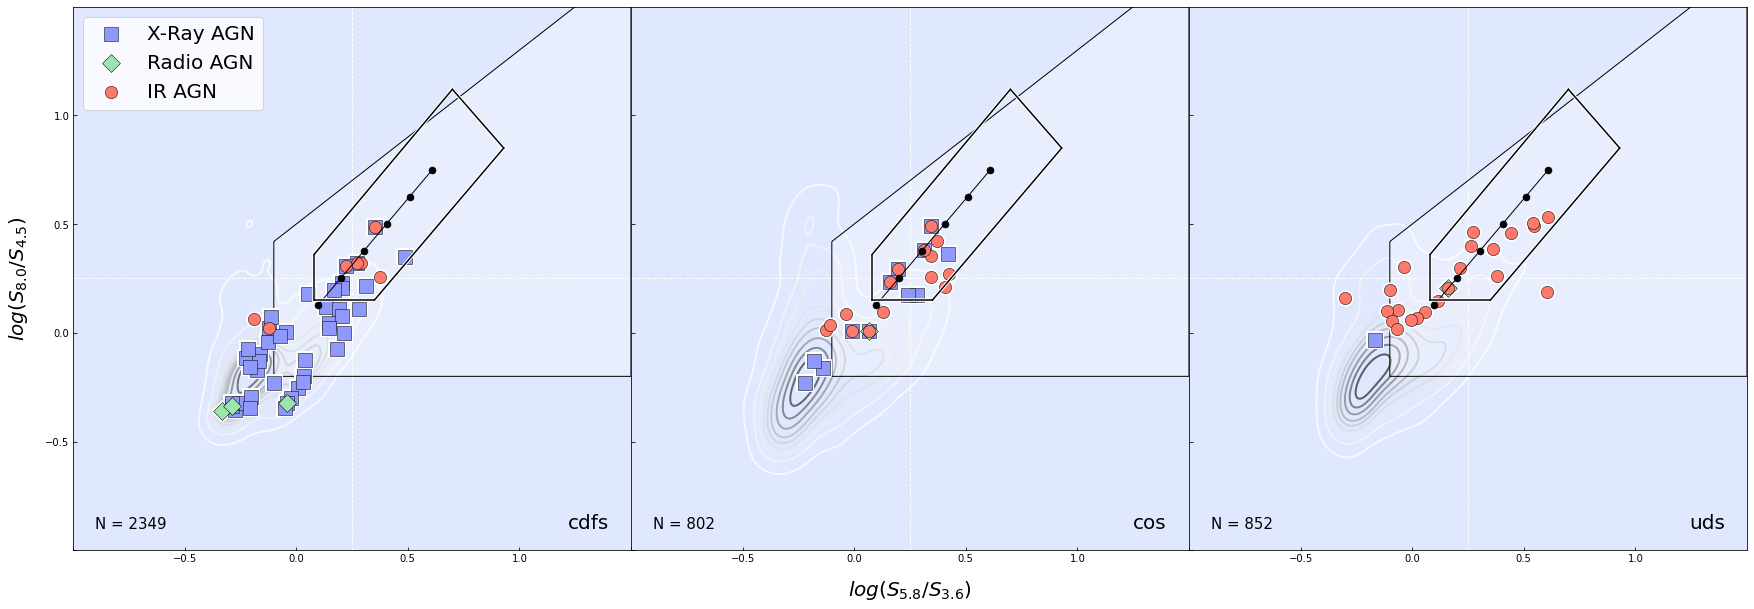

In [8]:
# ---------- Lacy Wedge (Donley, "True"; 3 x 1) ----------

# This plot utilises both the Lacy (outer boundaries) and Donley (inner locus) diagnostics for a SNR > 5 and use = 1 (see
# Straatman et al. (2016)) filtered population whose AGN contribution is equal to, or exceeds, 50%.


fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, sharey = True, figsize = (30, 10))

plt.subplots_adjust(wspace = 0.0)



# ----- Plot Loops & Variable Stand-Ins -----

subplots = [ax1, ax2, ax3]

xd, yd = '58_36', '80_45'

xlim, ylim = [-1, 1.5], [-1, 1.5]
xtick, ytick = np.arange(-1, 1.5, 0.5), np.arange(-1, 1.5, 0.5)

x1 = np.linspace(-0.1, 1.5, 100)
y1, y2 = -0.2, 0.8 * x1 + 0.5



for dataset, ax, field in zip(datasets, subplots, fields):

    filtered_dataset = dataset[dataset['true_agn'] == 1]

    # ----- Density Loop -----

    sns.kdeplot(x = xd, y = yd, data = dataset[dataset['agn'] == 0], **kde_params, ax = ax)

    # ----- Scatter Loops -----

    for agn_type, w_param in zip(agn_types, w_params):

        ax.scatter(
            x = filtered_dataset.loc[filtered_dataset[agn_type] == 1, xd],
            y = filtered_dataset.loc[filtered_dataset[agn_type] == 1, yd],
            **w_param)
    
    for agn_type, rgb_param in zip(agn_types, rgb_params):
       
        ax.scatter(
            x = filtered_dataset.loc[filtered_dataset[agn_type] == 1, xd],
            y = filtered_dataset.loc[filtered_dataset[agn_type] == 1, yd],
            label = agn_labels.get(agn_type, agn_type), 
            **rgb_param)
        
    # ----- Aesthetics -----
    
    ax.set_xlim(xlim); ax.set_ylim(ylim)
    ax.set_xticks(xtick); ax.set_yticks(ytick)

    xticks = ax.xaxis.get_major_ticks(); yticks = ax.yaxis.get_major_ticks()
    xticks[0].label1.set_visible(False); yticks[0].label1.set_visible(False)

    ax.tick_params(axis = "x", direction = "in"); ax.tick_params(axis = "y", direction = "in")

    ax.set_facecolor('#e0e8ff')

    ax.axhline(0.25, color = 'w', linewidth = 1, linestyle = '--', zorder = 1); ax.axvline(0.25, color = 'w', linewidth = 1, linestyle = '--', zorder = 1)

    # ----- Lacy Diagnostic -----

    ax.fill_between(x1, y1, y2, color = 'w', alpha = 0.3, zorder = 2); ax.fill_between(x1, y1, y2, color = 'none', edgecolor = 'black', alpha = 1, zorder = 2)

    # ----- Donley Power-Law -----

    line_params_black = {'color': 'black', 'linewidth': 1.5, 'linestyle': '-', 'zorder': 5}
    line_params_white = {'color': 'white', 'linewidth': 3.5, 'linestyle': '-', 'zorder': 5}
    scatter_params = {'s': 50, 'color': 'black', 'marker': 'o', 'edgecolor': 'k', 'linewidth': 0.5, 'zorder': 5}

    ax.plot([0.1, 0.61], [0.13, 0.75], color = 'black', linewidth = 1, linestyle = '-', zorder = 5)

    ax.scatter([0.1, 0.202, 0.304, 0.406, 0.508, 0.61], [0.13, 0.254, 0.378, 0.502, 0.626, 0.75], **scatter_params)

    lines = [([0.35, 0.93], [0.15, 0.85]), ([0.93, 0.7], [0.85, 1.12]), ([0.7, 0.08], [1.12, 0.36]), ([0.08, 0.08], [0.36, 0.15]), ([0.08, 0.35], [0.15, 0.15])]

    for x, y in lines:
        ax.plot(x, y, **line_params_white)

    for x, y in lines:
        ax.plot(x, y, **line_params_black)

    # ----- Labels -----

    ax.text(1.4, -0.9, field, fontsize = 20, ha = 'right'); ax.text(-0.9, -0.9, f'N = {len(dataset)}', fontsize = 15, ha = 'left')

    ax1.set_xlabel(''); ax3.set_xlabel(''); ax1.yaxis.labelpad = 15; ax2.xaxis.labelpad = 15
    ax1.set_ylabel('$log (S_{8.0}/S_{4.5})$', size = '20'); ax2.set_xlabel('$log (S_{5.8}/S_{3.6})$', size = '20')

    ax1.legend(loc = 'upper left', fontsize = '20', frameon = True)


#fig.savefig('/Users/jess/Desktop/python/diagnostic_plots/outputs/ir/lacy_donley_31_true.png', bbox_inches = 'tight', dpi = 300, transparent = False)

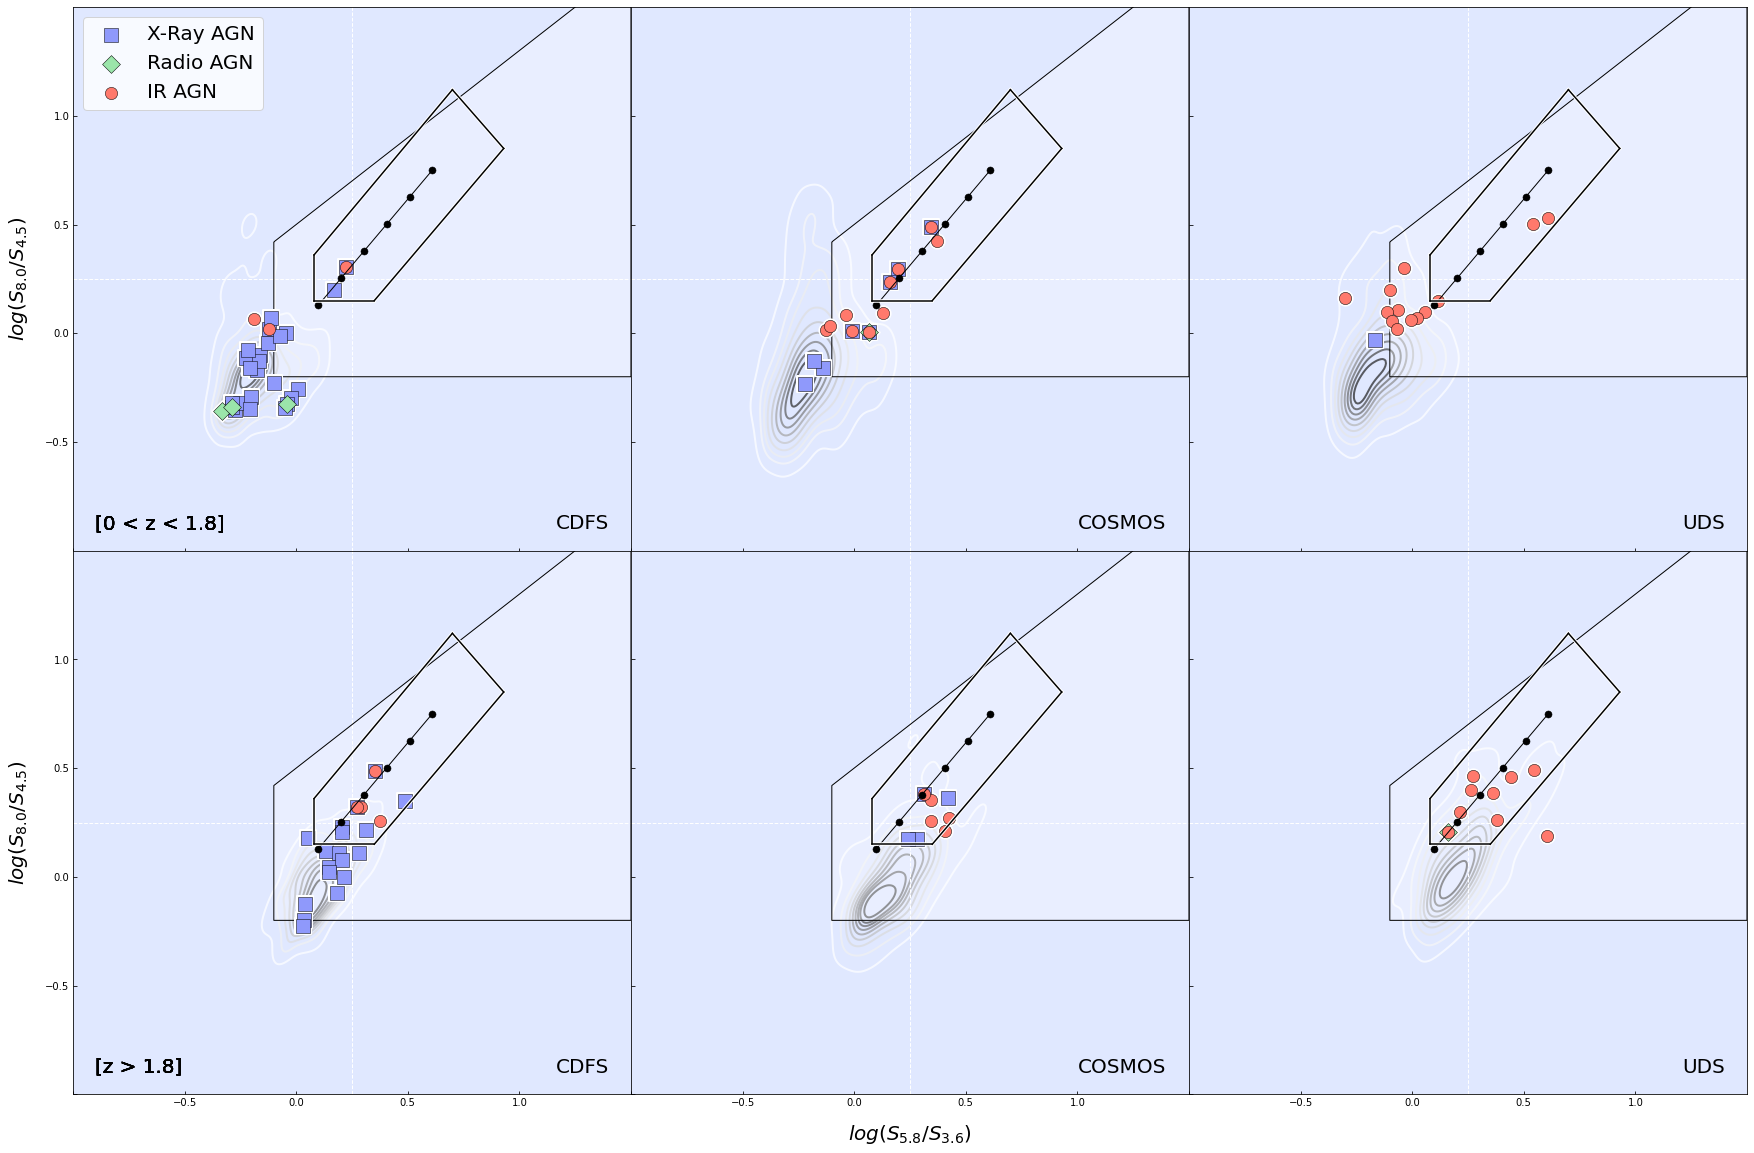

In [276]:
# ---------- Lacy Wedge (Donley; 3 x 2) ----------

# This plot utilises both the Lacy (outer boundaries) and Donley (inner locus) diagnostics for a SNR > 5 and use = 1 (see
# Straatman et al. (2016)) filtered population, whose AGN contribution is equal to, or exceeds, 50%, with the addition of 
# z = 0 - 1.8 and z > 1.8 redshfit bins which reflect those used in Messias et al. (2012).

fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows = 2, ncols = 3, sharey = True, sharex = True, figsize = (30, 20))

plt.subplots_adjust(wspace = 0.0); plt.subplots_adjust(hspace = 0.0)


# ----- Plot Loops & Variable Stand-Ins -----

subplots = [ax1, ax2, ax3, ax4, ax5, ax6]
kde_datasets = [(cdfs, cdfs_bel_18, ax1), (cdfs, cdfs_abo_18, ax4), (cos, cos_bel_18, ax2), (cos, cos_abo_18, ax5), (uds, uds_bel_18, ax3), (uds, uds_abo_18, ax6)]

xd, yd = '58_36', '80_45'

xlim, ylim = [-1, 1.5], [-1, 1.5]
xtick, ytick = np.arange(-1, 1.5, 0.5), np.arange(-1, 1.5, 0.5)

x1 = np.linspace(-0.1, 1.5, 100)
y1, y2 = -0.2, 0.8 * x1 + 0.5



# ----- Density Loop -----

for data, condition, ax in kde_datasets:
    sns.kdeplot(x = xd, y = yd, data = data[(data['agn'] == 0) & condition], **kde_params, ax=ax)



# ----- Scatter Loop -----
    
field_subplots =[(ax1, ax4), (ax2, ax5), (ax3, ax6)]
field_z_values = [(cdfs_bel_18, cdfs_abo_18), (cos_bel_18, cos_abo_18), (uds_bel_18, uds_abo_18)]


for dataset, subplot_list, z_value_list in zip(datasets, field_subplots, field_z_values):

    for ax, z_value in zip(subplot_list, z_value_list):

        for column_name, w_param in zip(agn_types, w_params):

            ax.scatter(
                x = dataset.loc[(dataset[column_name] == 1) & (dataset['true_agn'] == 1) & z_value, xd],
                y = dataset.loc[(dataset[column_name] == 1) & (dataset['true_agn'] == 1) & z_value, yd],
                **w_param)
            
        for column_name, rgb_param in zip(agn_types, rgb_params):

            ax.scatter(
                x = dataset.loc[(dataset[column_name] == 1) & (dataset['true_agn'] == 1) & z_value, xd],
                y = dataset.loc[(dataset[column_name] == 1) & (dataset['true_agn'] == 1) & z_value, yd],
                label = agn_labels.get(column_name, column_name), 
                **rgb_param)



# ----- Plot Visuals -----

labels = ['CDFS', 'COSMOS', 'UDS']  # The correct labels for the fields
label_indices = [0, 1, 2, 0, 1, 2]  # Indices to match labels to the correct axes
    

for dataset, ax, label_index in zip(datasets * 2, subplots, label_indices):

    field = labels[label_index]
        
    # ----- Aesthetics -----
    
    ax.set_xlim(xlim); ax.set_ylim(ylim)
    ax.set_xticks(xtick); ax.set_yticks(ytick)

    xticks = ax.xaxis.get_major_ticks(); yticks = ax.yaxis.get_major_ticks()
    xticks[0].label1.set_visible(False); yticks[0].label1.set_visible(False)

    ax.tick_params(axis = "x", direction = "in"); ax.tick_params(axis = "y", direction = "in")

    ax.set_facecolor('#e0e8ff')

    ax.axhline(0.25, color = 'w', linewidth = 1, linestyle = '--', zorder = 1); ax.axvline(0.25, color = 'w', linewidth = 1, linestyle = '--', zorder = 1)

    # ----- Lacy Diagnostic -----

    ax.fill_between(x1, y1, y2, color = 'w', alpha = 0.3, zorder = 2); ax.fill_between(x1, y1, y2, color = 'none', edgecolor = 'black', alpha = 1, zorder = 2)

    # ----- Donley Power-Law -----

    line_params_black = {'color': 'black', 'linewidth': 1.5, 'linestyle': '-', 'zorder': 5}
    line_params_white = {'color': 'white', 'linewidth': 3.5, 'linestyle': '-', 'zorder': 5}
    scatter_params = {'s': 50, 'color': 'black', 'marker': 'o', 'edgecolor': 'k', 'linewidth': 0.5, 'zorder': 5}

    ax.plot([0.1, 0.61], [0.13, 0.75], color = 'black', linewidth = 1, linestyle = '-', zorder = 5)

    ax.scatter([0.1, 0.202, 0.304, 0.406, 0.508, 0.61], [0.13, 0.254, 0.378, 0.502, 0.626, 0.75], **scatter_params)

    lines = [([0.35, 0.93], [0.15, 0.85]), ([0.93, 0.7], [0.85, 1.12]), ([0.7, 0.08], [1.12, 0.36]), ([0.08, 0.08], [0.36, 0.15]), ([0.08, 0.35], [0.15, 0.15])]

    for x, y in lines:
        ax.plot(x, y, **line_params_white)

    for x, y in lines:
        ax.plot(x, y, **line_params_black)

    # ----- Labels -----

    ax.text(1.4, -0.9, field, fontsize = 20, ha = 'right'); 
    ax1.text(-0.9, -0.9, '[0 < z < 1.8]', fontsize = 20, ha = 'left')
    ax4.text(-0.9, -0.9, '[z > 1.8]', fontsize = 20, ha = 'left')

    ax4.set_xlabel(''); ax6.set_xlabel(''); ax1.yaxis.labelpad = 15; ax4.yaxis.labelpad = 15; ax5.xaxis.labelpad = 15
    ax1.set_ylabel('$log (S_{8.0}/S_{4.5})$', size = '20');  ax4.set_ylabel('$log (S_{8.0}/S_{4.5})$', size = '20'); ax5.set_xlabel('$log (S_{5.8}/S_{3.6})$', size = '20')

    ax1.legend(loc = 'upper left', fontsize = '20', frameon = True)


fig.savefig('/Users/jess/Desktop/python/diagnostic_plots/outputs/ir/lacy_donley_32_true.png', bbox_inches = 'tight', dpi = 300, transparent = False)

In [137]:
# ---------- Completeness and Reliability Calculations (Lacy, True; Vanilla) ----------



# ---------- AGN(SEL): No. of AGN residing within the diagnostic region ----------

# ----- Define Functions -----

def agn_sel_filter_criteria(df):
    return (df['58_36'] > -0.1) & (df['80_45'] > -0.2) & (df['80_45'] < 0.8 * df['58_36'] + 0.5)

def agn_sel(df, agn_type):
    return len(df[(df[agn_type] == 1) & (df['true_agn'] == 1) & agn_sel_filter_criteria(df)])

def agn_sel_binned(df, agn_type, z_bin):
    return len(df[(df[agn_type] == 1) & (df['true_agn'] == 1) & z_bin & agn_sel_filter_criteria(df)])



# ----- Complete Sample; Redshift Binned (IR Only); AGN(SEL) -----

cdfs_ir_sel, cdfs_radio_sel, cdfs_xray_sel = agn_sel(cdfs, 'ir_agn'), agn_sel(cdfs, 'radio_agn'), agn_sel(cdfs, 'xray_agn')
cos_ir_sel, cos_radio_sel, cos_xray_sel = agn_sel(cos, 'ir_agn'), agn_sel(cos, 'radio_agn'), agn_sel(cos, 'xray_agn')
uds_ir_sel, uds_radio_sel, uds_xray_sel = agn_sel(uds, 'ir_agn'), agn_sel(uds, 'radio_agn'), agn_sel(uds, 'xray_agn')

cdfs_ir_z01_sel, cdfs_ir_z12_sel, cdfs_ir_z23_sel, cdfs_ir_z34_sel, cdfs_ir_z4_sel = agn_sel_binned(cdfs, 'ir_agn', cdfs_z01), agn_sel_binned(cdfs, 'ir_agn', cdfs_z12), agn_sel_binned(cdfs, 'ir_agn', cdfs_z23), agn_sel_binned(cdfs, 'ir_agn', cdfs_z34), agn_sel_binned(cdfs, 'ir_agn', cdfs_z4)
cos_ir_z01_sel, cos_ir_z12_sel, cos_ir_z23_sel, cos_ir_z34_sel, cos_ir_z4_sel = agn_sel_binned(cos, 'ir_agn', cos_z01), agn_sel_binned(cos, 'ir_agn', cos_z12), agn_sel_binned(cos, 'ir_agn', cos_z23), agn_sel_binned(cos, 'ir_agn', cos_z34), agn_sel_binned(cos, 'ir_agn', cos_z4)
uds_ir_z01_sel, uds_ir_z12_sel, uds_ir_z23_sel, uds_ir_z34_sel, uds_ir_z4_sel = agn_sel_binned(uds, 'ir_agn', uds_z01), agn_sel_binned(uds, 'ir_agn', uds_z12), agn_sel_binned(uds, 'ir_agn', uds_z23), agn_sel_binned(uds, 'ir_agn', uds_z34), agn_sel_binned(uds, 'ir_agn', uds_z4)

cdfs_agn_sel = cdfs_ir_sel + cdfs_radio_sel + cdfs_xray_sel
cos_agn_sel = cos_ir_sel + cos_radio_sel + cos_xray_sel
uds_agn_sel = uds_ir_sel + uds_radio_sel + uds_xray_sel



# ---------- AGN(TOT): No. of AGN according to Michael ----------

# ----- Complete Sample; Redshift Binned (IR Only); AGN(TOT) -----

cdfs_m_ir_agn_tot, cdfs_m_radio_agn_tot, cdfs_m_xray_agn_tot = len(cdfs[(cdfs['ir_agn'] == 1) & (cdfs['true_agn'] == 1)]), len(cdfs[(cdfs['radio_agn'] == 1) & (cdfs['true_agn'] == 1)]), len(cdfs[(cdfs['xray_agn'] == 1) & (cdfs['true_agn'] == 1)])
cos_m_ir_agn_tot, cos_m_radio_agn_tot, cos_m_xray_agn_tot = len(cos[(cos['ir_agn'] == 1) & (cos['true_agn'] == 1)]), len(cos[(cos['radio_agn'] == 1) & (cos['true_agn'] == 1)]), len(cos[(cos['xray_agn'] == 1) & (cos['true_agn'] == 1)])
uds_m_ir_agn_tot, uds_m_radio_agn_tot, uds_m_xray_agn_tot = len(uds[(uds['ir_agn'] == 1) & (uds['true_agn'] == 1)]), len(uds[(uds['radio_agn'] == 1) & (uds['true_agn'] == 1)]), len(uds[(uds['xray_agn'] == 1) & (uds['true_agn'] == 1)])

cdfs_m_ir_z01_agn_tot, cdfs_m_ir_z12_agn_tot, cdfs_m_ir_z23_agn_tot, cdfs_m_ir_z34_agn_tot, cdfs_m_ir_z4_agn_tot = len(cdfs[(cdfs['ir_agn'] == 1) & cdfs_z01 & (cdfs['true_agn'] == 1)]), len(cdfs[(cdfs['ir_agn'] == 1) & cdfs_z12 & (cdfs['true_agn'] == 1)]), len(cdfs[(cdfs['ir_agn'] == 1) & cdfs_z23 & (cdfs['true_agn'] == 1)]), len(cdfs[(cdfs['ir_agn'] == 1) & cdfs_z34 & (cdfs['true_agn'] == 1)]), len(cdfs[(cdfs['ir_agn'] == 1) & cdfs_z4 & (cdfs['true_agn'] == 1)])
cos_m_ir_z01_agn_tot, cos_m_ir_z12_agn_tot, cos_m_ir_z23_agn_tot, cos_m_ir_z34_agn_tot, cos_m_ir_z4_agn_tot = len(cos[(cos['ir_agn'] == 1) & cos_z01 & (cdfs['true_agn'] == 1)]), len(cos[(cos['ir_agn'] == 1) & cos_z12 & (cos['true_agn'] == 1)]), len(cos[(cos['ir_agn'] == 1) & cos_z23 & (cos['true_agn'] == 1)]), len(cos[(cos['ir_agn'] == 1) & cos_z34 & (cos['true_agn'] == 1)]), len(cos[(cos['ir_agn'] == 1) & cos_z4 & (cos['true_agn'] == 1)])
uds_m_ir_z01_agn_tot, uds_m_ir_z12_agn_tot, uds_m_ir_z23_agn_tot, uds_m_ir_z34_agn_tot, uds_m_ir_z4_agn_tot = len(uds[(uds['ir_agn'] == 1) & uds_z01 & (uds['true_agn'] == 1)]), len(uds[(uds['ir_agn'] == 1) & uds_z12 & (uds['true_agn'] == 1)]), len(uds[(uds['ir_agn'] == 1) & uds_z23 & (uds['true_agn'] == 1)]), len(uds[(uds['ir_agn'] == 1) & uds_z34 & (uds['true_agn'] == 1)]), len(uds[(uds['ir_agn'] == 1) & uds_z4 & (uds['true_agn'] == 1)])

cdfs_agn_tot_m = cdfs_m_ir_agn_tot + cdfs_m_radio_agn_tot + cdfs_m_xray_agn_tot
cos_agn_tot_m = cos_m_ir_agn_tot + cos_m_radio_agn_tot + cos_m_xray_agn_tot
uds_agn_tot_m = uds_m_ir_agn_tot + uds_m_radio_agn_tot + uds_m_xray_agn_tot



# ---------- N(SEL): No. of AGN + Non AGN Selected ----------

# ----- Define Functions -----

# Define filter criteria for nil AGN selection
def n_sel_filter_criteria(df):
    return (df['ir_agn'].isin([0, -1])) & (df['radio_agn'].isin([0, -1])) & (df['xray_agn'].isin([0, -1])) & \
           (df['58_36'] > -0.1) & (df['80_45'] > -0.2) & (df['80_45'] < 0.8 * df['58_36'] + 0.5)

# Define filter criteria for IR-only nil AGN selection
def ir_n_sel_filter_criteria(df):
    return (df['ir_agn'].isin([0, -1])) & (df['58_36'] > -0.1) & (df['80_45'] > -0.2) & \
           (df['80_45'] < 0.8 * df['58_36'] + 0.5)

# Apply filter criteria and count the selections
def n_sel(df, criteria_func):
    return len(df[criteria_func(df)])

# Apply filter criteria with redshift binning
def n_sel_binned(df, criteria_func, z_bin):
    return len(df[criteria_func(df) & z_bin])



# ----- Complete Sample; IR Only; Redshift Binned (IR Only) -----

cdfs_nil_nsel, cos_nil_nsel, uds_nil_nsel = n_sel(cdfs, n_sel_filter_criteria), n_sel(cos, n_sel_filter_criteria), n_sel(uds, n_sel_filter_criteria)

cdfs_ir_nil_nsel, cos_ir_nil_nsel, uds_ir_nil_nsel = n_sel(cdfs, ir_n_sel_filter_criteria), n_sel(cos, ir_n_sel_filter_criteria), n_sel(uds, ir_n_sel_filter_criteria)

cdfs_ir_z01_nil_nsel, cdfs_ir_z12_nil_nsel, cdfs_ir_z23_nil_nsel, cdfs_ir_z34_nil_nsel, cdfs_ir_z4_nil_nsel = n_sel_binned(cdfs, ir_n_sel_filter_criteria, cdfs_z01), n_sel_binned(cdfs, ir_n_sel_filter_criteria, cdfs_z12), n_sel_binned(cdfs, ir_n_sel_filter_criteria, cdfs_z23), n_sel_binned(cdfs, ir_n_sel_filter_criteria, cdfs_z34), n_sel_binned(cdfs, ir_n_sel_filter_criteria, cdfs_z4)
cos_ir_z01_nil_nsel, cos_ir_z12_nil_nsel, cos_ir_z23_nil_nsel, cos_ir_z34_nil_nsel, cos_ir_z4_nil_nsel = n_sel_binned(cos, ir_n_sel_filter_criteria, cos_z01), n_sel_binned(cos, ir_n_sel_filter_criteria, cos_z12), n_sel_binned(cos, ir_n_sel_filter_criteria, cos_z23), n_sel_binned(cos, ir_n_sel_filter_criteria, cos_z34), n_sel_binned(cos, ir_n_sel_filter_criteria, cos_z4)
uds_ir_z01_nil_nsel, uds_ir_z12_nil_nsel, uds_ir_z23_nil_nsel, uds_ir_z34_nil_nsel, uds_ir_z4_nil_nsel = n_sel_binned(uds, ir_n_sel_filter_criteria, uds_z01), n_sel_binned(uds, ir_n_sel_filter_criteria, uds_z12), n_sel_binned(uds, ir_n_sel_filter_criteria, uds_z23), n_sel_binned(uds, ir_n_sel_filter_criteria, uds_z34), n_sel_binned(uds, ir_n_sel_filter_criteria, uds_z4)

# ----- N(SEL) -----

cdfs_tot_nsel, cos_tot_nsel, uds_tot_nsel = cdfs_nil_nsel + cdfs_agn_sel, cos_nil_nsel + cos_agn_sel, uds_nil_nsel + uds_agn_sel

cdfs_ir_tot_nsel, cos_ir_tot_nsel, uds_ir_tot_nsel = cdfs_ir_nil_nsel + cdfs_ir_sel, cos_ir_nil_nsel + cos_ir_sel, uds_ir_nil_nsel + uds_ir_sel

cdfs_ir_z01_tot_nsel, cdfs_ir_z12_tot_nsel, cdfs_ir_z23_tot_nsel, cdfs_ir_z34_tot_nsel, cdfs_ir_z4_tot_nsel = cdfs_ir_z01_nil_nsel + cdfs_ir_z01_sel, cdfs_ir_z12_nil_nsel + cdfs_ir_z12_sel, cdfs_ir_z23_nil_nsel + cdfs_ir_z23_sel, cdfs_ir_z34_nil_nsel + cdfs_ir_z34_sel, cdfs_ir_z4_nil_nsel + cdfs_ir_z4_sel
cos_ir_z01_tot_nsel, cos_ir_z12_tot_nsel, cos_ir_z23_tot_nsel, cos_ir_z34_tot_nsel, cos_ir_z4_tot_nsel = cos_ir_z01_nil_nsel + cos_ir_z01_sel, cos_ir_z12_nil_nsel + cos_ir_z12_sel, cos_ir_z23_nil_nsel + cos_ir_z23_sel, cos_ir_z34_nil_nsel + cos_ir_z34_sel, cos_ir_z4_nil_nsel + cos_ir_z4_sel
uds_ir_z01_tot_nsel, uds_ir_z12_tot_nsel, uds_ir_z23_tot_nsel, uds_ir_z34_tot_nsel, uds_ir_z4_tot_nsel = uds_ir_z01_nil_nsel + uds_ir_z01_sel, uds_ir_z12_nil_nsel + uds_ir_z12_sel, uds_ir_z23_nil_nsel + uds_ir_z23_sel, uds_ir_z34_nil_nsel + uds_ir_z34_sel, uds_ir_z4_nil_nsel + uds_ir_z4_sel



# ---------- Completeness: AGN(SEL) / AGN(TOT) ----------

# ----- Complete Sample; IR Only; Redshift Binned (IR Only) -----

cdfs_com, cos_com, uds_com = cdfs_agn_sel / cdfs_agn_tot_m, cos_agn_sel / cos_agn_tot_m, uds_agn_sel / uds_agn_tot_m

cdfs_ir_com, cos_ir_com, uds_ir_com = cdfs_ir_sel / cdfs_m_ir_agn_tot, cos_ir_sel / cos_m_ir_agn_tot, uds_ir_sel / uds_m_ir_agn_tot

cdfs_ir_z01_com, cdfs_ir_z12_com, cdfs_ir_z23_com, cdfs_ir_z34_com, cdfs_ir_z4_com = cdfs_ir_z01_sel / cdfs_m_ir_z01_agn_tot, cdfs_ir_z12_sel / cdfs_m_ir_z12_agn_tot, cdfs_ir_z23_sel / cdfs_m_ir_z23_agn_tot, cdfs_ir_z34_sel / cdfs_m_ir_z34_agn_tot, cdfs_ir_z4_sel / cdfs_m_ir_z4_agn_tot
cos_ir_z01_com, cos_ir_z12_com, cos_ir_z23_com, cos_ir_z34_com, cos_ir_z4_com = cos_ir_z01_sel / cos_m_ir_z01_agn_tot, cos_ir_z12_sel / cos_m_ir_z12_agn_tot, cos_ir_z23_sel / cos_m_ir_z23_agn_tot, cos_ir_z34_sel / cos_m_ir_z34_agn_tot, cos_ir_z4_sel / cos_m_ir_z4_agn_tot
uds_ir_z01_com, uds_ir_z12_com, uds_ir_z23_com, uds_ir_z34_com, uds_ir_z4_com = uds_ir_z01_sel / uds_m_ir_z01_agn_tot, uds_ir_z12_sel / uds_m_ir_z12_agn_tot, uds_ir_z23_sel / uds_m_ir_z23_agn_tot, uds_ir_z34_sel / uds_m_ir_z34_agn_tot, uds_ir_z4_sel / uds_m_ir_z4_agn_tot



# ---------- Reliability: AGN(SEL) / N(SEL) ----------

# ----- Complete Sample; IR Only; Redshift Binned (IR Only) -----

cdfs_rel, cos_rel, uds_rel = cdfs_agn_sel / cdfs_tot_nsel, cos_agn_sel / cos_tot_nsel, uds_agn_sel / uds_tot_nsel

cdfs_ir_rel, cos_ir_rel, uds_ir_rel = cdfs_ir_sel / cdfs_ir_tot_nsel, cos_ir_sel / cos_ir_tot_nsel, uds_ir_sel / uds_ir_tot_nsel

cdfs_ir_z01_rel, cdfs_ir_z12_rel, cdfs_ir_z23_rel, cdfs_ir_z34_rel, cdfs_ir_z4_rel = cdfs_ir_z01_sel / cdfs_ir_z01_tot_nsel, cdfs_ir_z12_sel / cdfs_ir_z12_tot_nsel, cdfs_ir_z23_sel / cdfs_ir_z23_tot_nsel, cdfs_ir_z34_sel / cdfs_ir_z34_tot_nsel, cdfs_ir_z4_sel / cdfs_ir_z4_tot_nsel
cos_ir_z01_rel, cos_ir_z12_rel, cos_ir_z23_rel, cos_ir_z34_rel, cos_ir_z4_rel = cos_ir_z01_sel / cos_ir_z01_tot_nsel, cos_ir_z12_sel / cos_ir_z12_tot_nsel, cos_ir_z23_sel / cos_ir_z23_tot_nsel, cos_ir_z34_sel / cos_ir_z34_tot_nsel, cos_ir_z4_sel / cos_ir_z4_tot_nsel
uds_ir_z01_rel, uds_ir_z12_rel, uds_ir_z23_rel, uds_ir_z34_rel, uds_ir_z4_rel = uds_ir_z01_sel / uds_ir_z01_tot_nsel, uds_ir_z12_sel / uds_ir_z12_tot_nsel, uds_ir_z23_sel / uds_ir_z23_tot_nsel, uds_ir_z34_sel / uds_ir_z34_tot_nsel, uds_ir_z4_sel / uds_ir_z4_tot_nsel



# ---------- Print Results ----------

# ----- Complete Sample; IR Only; Redshift Binned (IR Only) -----

print('---------- Lacy; Vanilla ----------'); print('\n')

print('----- Complete Sample -----'); print('\n')
print(f'Completeness: CDFS = {cdfs_com * 100:.2f}%, COSMOS = {cos_com * 100:.2f}%, UDS = {uds_com * 100:.2f}%'); print(f'Reliability: CDFS = {cdfs_rel * 100:.2f}%, COSMOS = {cos_rel * 100:.2f}%, UDS = {uds_rel * 100:.2f}%'); print('\n')

print('----- IR Only -----'); print('\n')
print(f'Completeness (IR): CDFS = {cdfs_ir_com * 100:.2f}%, COSMOS = {cos_ir_com * 100:.2f}%, UDS = {uds_ir_com * 100:.2f}%'); print(f'Reliability (IR): CDFS = {cdfs_ir_rel * 100:.2f}%, COSMOS = {cos_ir_rel * 100:.2f}%, UDS = {uds_ir_rel * 100:.2f}%'); print('\n')

print('----- Redshift Binned (IR Only) -----'); print('\n')

print('For [0 < z < 1]'); print('\n')
print(f'Completeness (IR, 0 < z < 1): CDFS = {cdfs_ir_z01_com * 100:.2f}%, COSMOS = {cos_ir_z01_com * 100:.2f}%, UDS = {uds_ir_z01_com * 100:.2f}%'); print(f'Reliability (IR, 0 < z < 1): CDFS = {cdfs_ir_z01_rel * 100:.2f}%, COSMOS = {cos_ir_z01_rel * 100:.2f}%, UDS = {uds_ir_z01_rel * 100:.2f}%'); print('\n')

print('For [1 < z < 2]'); print('\n')
print(f'Completeness (IR, 1 < z < 2): CDFS = {cdfs_ir_z12_com * 100:.2f}%, COSMOS = {cos_ir_z12_com * 100:.2f}%, UDS = {uds_ir_z12_com * 100:.2f}%'); print(f'Reliability (IR, 1 < z < 2): CDFS = {cdfs_ir_z12_rel * 100:.2f}%, COSMOS = {cos_ir_z12_rel * 100:.2f}%, UDS = {uds_ir_z12_rel * 100:.2f}%'); print('\n')

print('FOr [2 < z < 3]'); print('\n')
print(f'Completeness (IR, 2 < z < 3): CDFS = {cdfs_ir_z23_com * 100:.2f}%, COSMOS = {cos_ir_z23_com * 100:.2f}%, UDS = {uds_ir_z23_com * 100:.2f}%'); print(f'Reliability (IR, 2 < z < 3): CDFS = {cdfs_ir_z23_rel * 100:.2f}%, COSMOS = {cos_ir_z23_rel * 100:.2f}%, UDS = {uds_ir_z23_rel * 100:.2f}%'); print('\n')

print('For [3 < z < 4]'); print('\n')
print(f'Completeness (IR, 3 < z < 4): CDFS = {cdfs_ir_z34_com * 100:.2f}%, COSMOS = {cos_ir_z34_com * 100:.2f}%, UDS = {uds_ir_z34_com * 100:.2f}%'); print(f'Reliability (IR, 3 < z < 4): CDFS = {cdfs_ir_z34_rel * 100:.2f}%, COSMOS = {cos_ir_z34_rel * 100:.2f}%, UDS = {uds_ir_z34_rel * 100:.2f}%'); print('\n')

print('For [z > 4]'); print('\n')
print(f'Completeness (IR, z > 4): CDFS = {cdfs_ir_z4_com * 100:.2f}%, COSMOS = {cos_ir_z4_com * 100:.2f}%, UDS = {uds_ir_z4_com * 100:.2f}%'); print(f'Reliability (IR, z > 4): CDFS = {cdfs_ir_z4_rel * 100:.2f}%, COSMOS = {cos_ir_z4_rel * 100:.2f}%, UDS = {uds_ir_z4_rel * 100:.2f}%')

/var/folders/0x/kkmrq_ds03s51qwcspg7hcrr0000gn/T/ipykernel_5889/2409668999.py:45: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cos_m_ir_z01_agn_tot, cos_m_ir_z12_agn_tot, cos_m_ir_z23_agn_tot, cos_m_ir_z34_agn_tot, cos_m_ir_z4_agn_tot = len(cos[(cos['ir_agn'] == 1) & cos_z01 & (cdfs['true_agn'] == 1)]), len(cos[(cos['ir_agn'] == 1) & cos_z12 & (cos['true_agn'] == 1)]), len(cos[(cos['ir_agn'] == 1) & cos_z23 & (cos['true_agn'] == 1)]), len(cos[(cos['ir_agn'] == 1) & cos_z34 & (cos['true_agn'] == 1)]), len(cos[(cos['ir_agn'] == 1) & cos_z4 & (cos['true_agn'] == 1)])


ZeroDivisionError: division by zero

Doing plot 0
	 scatterplot...
Doing plot 1
	 scatterplot...
Doing plot 2
	 scatterplot...


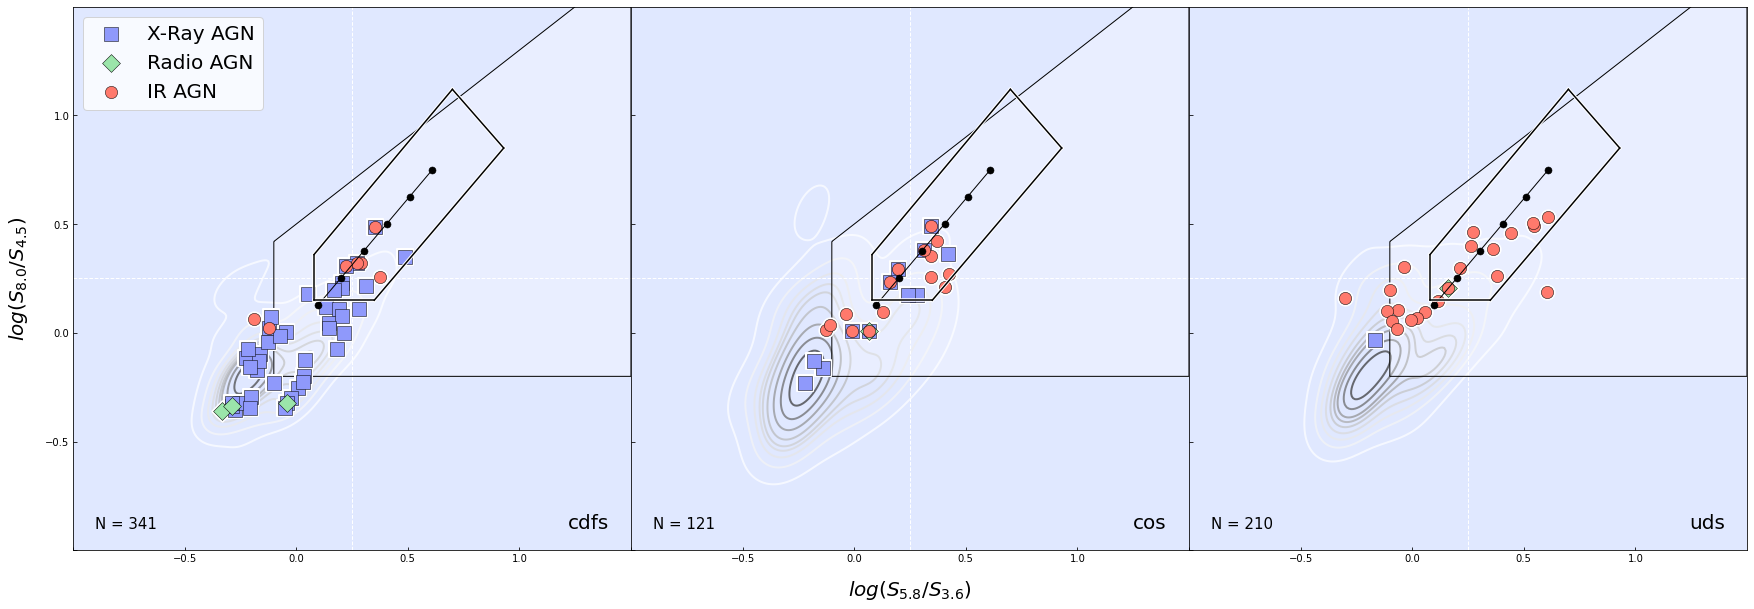

:)


In [26]:
from lacy_fn import lacy

lacy('true_agn', val = 1)

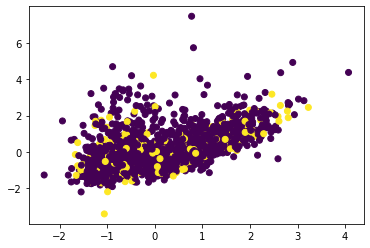

In [11]:
import matplotlib.pyplot as plt
plt.scatter(cdfs['58_36'], cdfs['80_45'], c = cdfs['true_agn'])

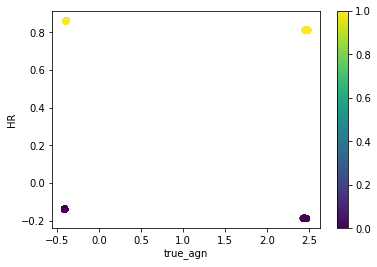

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

x = 'true_agn'
y = 'HR'

pca = PCA()
Xt = pca.fit_transform(cdfs[[x, y]])
plt.scatter(Xt[:, 0], Xt[:, 1], c = cdfs['true_agn'], cmap='viridis')

# Add labels and legend
plt.xlabel(x)
plt.ylabel(y)

# add label for color

plt.colorbar()

plt.show()


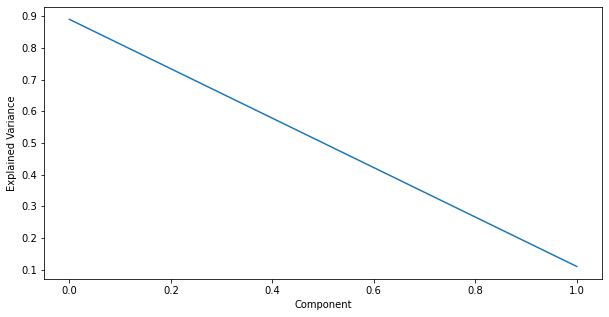

In [25]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# make large fig space

fig = plt.figure(figsize=(10, 5))

plt.plot(pca.explained_variance_ratio_)
plt.xlabel('Component')
plt.ylabel('Explained Variance')
plt.show()

In [27]:
# Wine is a classification dataset with 178 sources, 13 variables (i.e. 13-dimensional) and 3 classes.

X, y = cdfs['data'], cdfs['target']
print(X.shape)
print(y.shape)

KeyError: 'data'

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

x = 'true_agn'
y = 'HR'

pca = PCA()
Xt = pca.fit_transform(cdfs)
plt.scatter(Xt[:, 0], Xt[:, 1], c = cdfs['true_agn'], cmap  = 'viridis')

In [52]:
# convert the cdfs dataframe to a numpy matrix

X = cdfs.values
y = cdfs['agn']

print(X.shape)

print(X)

(2349, 150)
[[ 5.74600000e+03  5.30671310e+01 -2.78838558e+01 ... -2.67232058e-02
  -3.22554279e-02  0.00000000e+00]
 [ 5.86000000e+03  5.30606155e+01 -2.78823376e+01 ... -3.29178688e-02
  -3.52481461e-02  0.00000000e+00]
 [ 5.86400000e+03  5.30629921e+01 -2.78831940e+01 ... -3.28585267e-02
  -3.50845517e-02  0.00000000e+00]
 ...
 [ 3.07810000e+04  5.31588287e+01 -2.76624489e+01 ... -3.29899089e-02
  -3.53544000e-02  0.00000000e+00]
 [ 3.08100000e+04  5.31636200e+01 -2.76655064e+01 ... -3.22639073e-02
  -3.42835999e-02  0.00000000e+00]
 [ 3.09080000e+04  5.31485329e+01 -2.76576252e+01 ...             nan
              nan  0.00000000e+00]]


In [55]:
from sklearn.decomposition import PCA

X = np.nan_to_num(X)
pca = PCA()
Xt = pca.fit_transform(X)

print(Xt.shape)
print(Xt)

np.savetxt('auto', Xt)

(2349, 150)
[[ 1.37778874e+04  5.35716299e+01  2.64348635e+00 ... -1.78501542e-13
   1.09854948e-12 -8.41949520e-13]
 [ 1.36637863e+04 -4.82320226e+01  1.64918694e+00 ... -5.09239571e-13
  -2.94400681e-13 -1.72079036e-12]
 [ 1.36597865e+04 -4.81938544e+01  1.54021941e+00 ... -1.15650131e-12
   1.21577251e-12  7.85671335e-13]
 ...
 [-1.12572022e+04 -2.34713158e+01  1.31933612e+01 ...  2.08074324e-12
  -3.22765938e-13  1.34653513e-12]
 [-1.12862017e+04 -2.37511055e+01 -6.01316098e-01 ... -2.10845495e-13
   2.72141126e-13 -2.63726323e-13]
 [-1.13842018e+04 -2.36339228e+01  3.66781461e-01 ... -2.73871758e-13
   3.79447506e-13 -1.75624130e-13]]


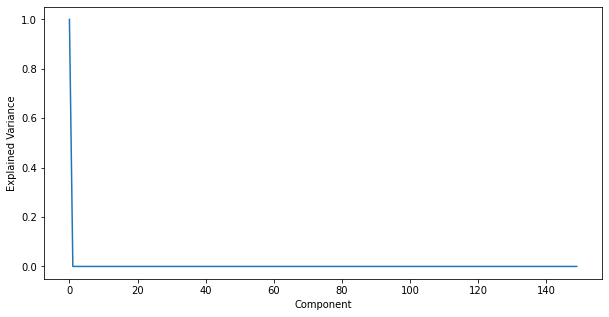

In [54]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# make large fig space

fig = plt.figure(figsize = (10, 5))

plt.plot(pca.explained_variance_ratio_)
plt.xlabel('Component')
plt.ylabel('Explained Variance')
plt.show()